In [2]:
import json

file_path = '20B_tokenizer.json'

with open(file_path, 'r') as file:
    tokenizer_data = json.load(file)

num_elements = len(tokenizer_data)
print("Number of elements:", num_elements)


Number of elements: 9


In [8]:
from src.utils import TOKENIZER
WORD_NAME = ['20B_tokenizer.json', '20B_tokenizer.json']
tokenizer = TOKENIZER(WORD_NAME, UNKNOWN_CHAR=UNKNOWN_CHAR)
if TOKEN_MODE == 'pile':
    tokenizer.vocab_size = 50277

{'version': '1.0',
 'truncation': None,
 'padding': None,
 'added_tokens': [{'id': 0,
   'special': True,
   'content': '<|endoftext|>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False},
  {'id': 1,
   'special': True,
   'content': '<|padding|>',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': False},
  {'id': 50254,
   'special': False,
   'content': '                        ',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': True},
  {'id': 50255,
   'special': False,
   'content': '                       ',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': True},
  {'id': 50256,
   'special': False,
   'content': '                      ',
   'single_word': False,
   'lstrip': False,
   'rstrip': False,
   'normalized': True},
  {'id': 50257,
   'special': False,
   'content': '                     ',
   'single_word': False,
   'lstrip': False,


In [1]:
import torch.nn as nn

sparsing_fns = nn.ModuleDict({
                'key': nn.Identity(), 
                'val': nn.Identity(),
                'rec': nn.Identity(),
                'out': nn.Identity()
        })

In [2]:
for key, val in sparsing_fns.items():
    print(key, val)

key Identity()
val Identity()
rec Identity()
out Identity()


In [8]:
sparsing_fns.values()

odict_values([Identity(), Identity(), Identity(), Identity()])

## Iterative top-K initialization 

In [12]:
results = {'att.sparsing_fns.key': [0.5, 0.5, 0.5989583333333334, 0.5, 0.5, 0.5989583333333334, 0.5, 0.5989583333333334, 0.5, 0.3997395833333333, 0.5, 0.3997395833333333], 'att.sparsing_fns.val': [0.69921875, 0.69921875, 0.5989583333333334, 0.69921875, 0.5, 0.69921875, 0.5989583333333334, 0.5, 0.5, 0.5989583333333334, 0.5, 0.5989583333333334], 'att.sparsing_fns.rec': [0.69921875, 0.7994791666666666, 0.5989583333333334, 0.5989583333333334, 0.5989583333333334, 0.5989583333333334, 0.5, 0.69921875, 0.5989583333333334, 0.5989583333333334, 0.5, 0.5989583333333334], 'att.sparsing_fns.out': [0.69921875, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.69921875, 0.7994791666666666, 0.5989583333333334, 0.5989583333333334, 0.5989583333333334, 0.5, 0.5989583333333334], 'ffn.sparsing_fns.key': [0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.7994791666666666, 0.69921875, 0.69921875, 0.7994791666666666, 1.0], 'ffn.sparsing_fns.val': [0.2994791666666667, 0.19921875, 0.19921875, 0.2994791666666667, 0.2994791666666667, 0.2994791666666667, 0.3997395833333333, 0.2994791666666667, 0.19921875, 0.2994791666666667, 0.2994791666666667, 0.69921875], 'ffn.sparsing_fns.rec': [0.5989583333333334, 0.5989583333333334, 0.5, 0.5989583333333334, 0.5989583333333334, 0.5, 0.5, 0.3997395833333333, 0.5, 0.5, 0.3997395833333333, 0.69921875]}
rounded_results = {}
for key, value in results.items():
    rounded_results[key] = [round(num, 2) for num in value]
results = rounded_results
print(results)
for layer in range(12):
    print("Layer:", layer)
    sparsities = []
    for key, value in results.items():
        sparsities.append(value[layer])
    print("Average sparsity:", sum(sparsities) / len(sparsities), end='\n\n')

print('Average sparsity:', sum([sum(value) for value in results.values()]) / sum([len(value) for value in results.values()])) 
for key, value in results.items():
    print(key, sum(value) / len(value))

{'att.sparsing_fns.key': [0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.4, 0.5, 0.4], 'att.sparsing_fns.val': [0.7, 0.7, 0.6, 0.7, 0.5, 0.7, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6], 'att.sparsing_fns.rec': [0.7, 0.8, 0.6, 0.6, 0.6, 0.6, 0.5, 0.7, 0.6, 0.6, 0.5, 0.6], 'att.sparsing_fns.out': [0.7, 0.8, 0.8, 0.8, 0.8, 0.7, 0.8, 0.6, 0.6, 0.6, 0.5, 0.6], 'ffn.sparsing_fns.key': [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7, 0.7, 0.8, 1.0], 'ffn.sparsing_fns.val': [0.3, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.3, 0.2, 0.3, 0.3, 0.7], 'ffn.sparsing_fns.rec': [0.6, 0.6, 0.5, 0.6, 0.6, 0.5, 0.5, 0.4, 0.5, 0.5, 0.4, 0.7]}
Layer: 0
Average sparsity: 0.6142857142857141

Layer: 1
Average sparsity: 0.6285714285714284

Layer: 2
Average sparsity: 0.5857142857142856

Layer: 3
Average sparsity: 0.6142857142857141

Layer: 4
Average sparsity: 0.5857142857142856

Layer: 5
Average sparsity: 0.5999999999999999

Layer: 6
Average sparsity: 0.5857142857142856

Layer: 7
Average sparsity: 0.5571428571428572

Layer: 8
Average spar

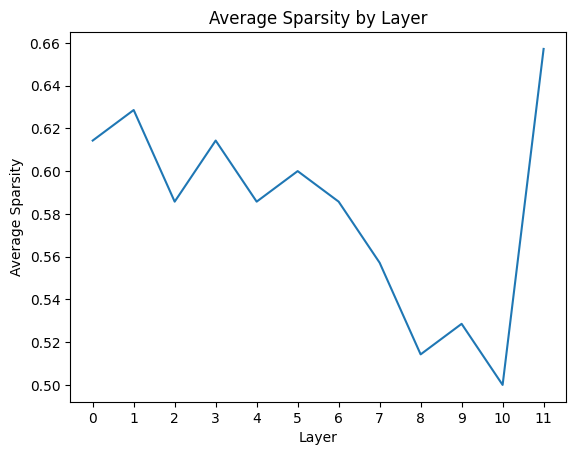

In [13]:
import matplotlib.pyplot as plt


layers = range(12)
sparsities = []
for layer in layers:
    sparsity = sum(results[key][layer] for key in results) / len(results)
    sparsities.append(sparsity)

plt.plot(layers, sparsities)
plt.xticks(layers)
plt.xlabel('Layer')
plt.ylabel('Average Sparsity')
plt.title('Average Sparsity by Layer')
plt.show()


In [3]:
import torch

x = torch.randint(0, 10, (1, 2, 5))
thres = torch.randint(0, 10, (1, 5))
print(x)
print(thres)


tensor([[[1, 5, 1, 0, 6],
         [6, 3, 0, 9, 8]]])
tensor([[0, 5, 5, 1, 3]])


/mnt/space/ivan/transformers/rwkv/rwkv_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
x.dtype

torch.int64

In [2]:
print(x * (x > thres).type_as(x) + x * (x < -thres).type_as(x))

NameError: name 'x' is not defined

In [1]:
inv_k = x.size(-1) - 2
_, indices = torch.topk(torch.abs(x), inv_k, dim=-1, largest=False)
x = x.scatter(dim=-1, index=indices, value=0)
x

NameError: name 'x' is not defined

In [1]:
a = 'blocks.0.att.sparsing_fns.val.k'
a[:a.rfind('.')] 

'blocks.0.att.sparsing_fns.val'

In [29]:
import torch 
tensor = torch.randint(0, 2, (3, 5)).float()
print(tensor)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0.]])


In [32]:
import torch

# Create a sample 2D tensor
tensor = torch.tensor([[0, 2, 3],
                       [4, 0, 6],
                       [7, 8, 0]]).float()

# Replace zeros with infinity so that they don't interfere with finding minimum
masked_tensor = tensor.masked_fill(tensor == 0, float('inf'))

# Find the minimum non-zero value for each row
min_non_zero_values, _ = torch.min(masked_tensor, dim=1)

print(min_non_zero_values)

tensor([2., 4., 7.])


In [28]:
torch.mean(torch.tensor([row[row > 0].min() for row in tensor]))

tensor(1.)

In [11]:
import torch 

x = torch.rand(16, 1024, 768)

In [15]:
torch.quantile(torch.flatten(x, 0, -2), 0.7, interpolation='linear', keepdim=False, dim=1)


tensor([0.6758, 0.6890, 0.7182,  ..., 0.6961, 0.7056, 0.7121])

In [19]:
torch.cat([torch.tensor([]), torch.tensor([2.])])

tensor([2.])

In [3]:
import torch
x = torch.tensor(1.0)
x.item()

1.0

In [7]:
a = {'ket': 4, 'fdsf': 6}
for name, i in a.items():
    print(i)

('ket', 4)
('fdsf', 6)


In [1]:
a = {}
a.items()

dict_items([])

In [29]:
import numpy as np

# a = [round(i, 2) for i in np.geomspace(0.2, 0.01, 10)]
# np.unique(np.round(np.geomspace(1.0, 0.01, 10), 2))[::-1]
# np.exp(np.arange(0, -np.log(0.9), -0.1))
np.unique(np.round(np.geomspace(0.2, 0.01, 8), 2))[::-1]

# np.unique(np.round(np.linspace(0.2, 0.01, 10), 2))[::-1]
np.unique(np.round(np.geomspace(0.9, 0.01, 10), 2))[::-1]



array([0.9 , 0.55, 0.33, 0.2 , 0.12, 0.07, 0.04, 0.03, 0.02, 0.01])

In [9]:
import numpy as np
np.unique(np.round(np.geomspace(0.9, 0.1, 9), 2))[::-1]


array([0.9 , 0.68, 0.52, 0.39, 0.3 , 0.23, 0.17, 0.13, 0.1 ])

In [6]:
import torch 
k = 1
x = torch.tensor([[1, 2, 3], [4, 5, 6]]).bfloat16()
inv_k = 3 - k
_, indices = torch.topk(torch.abs(x), inv_k, dim=-1, largest=False)
x = x.scatter(dim=-1, index=indices, value=0)
x

tensor([[0., 0., 3.],
        [0., 0., 6.]], dtype=torch.bfloat16)

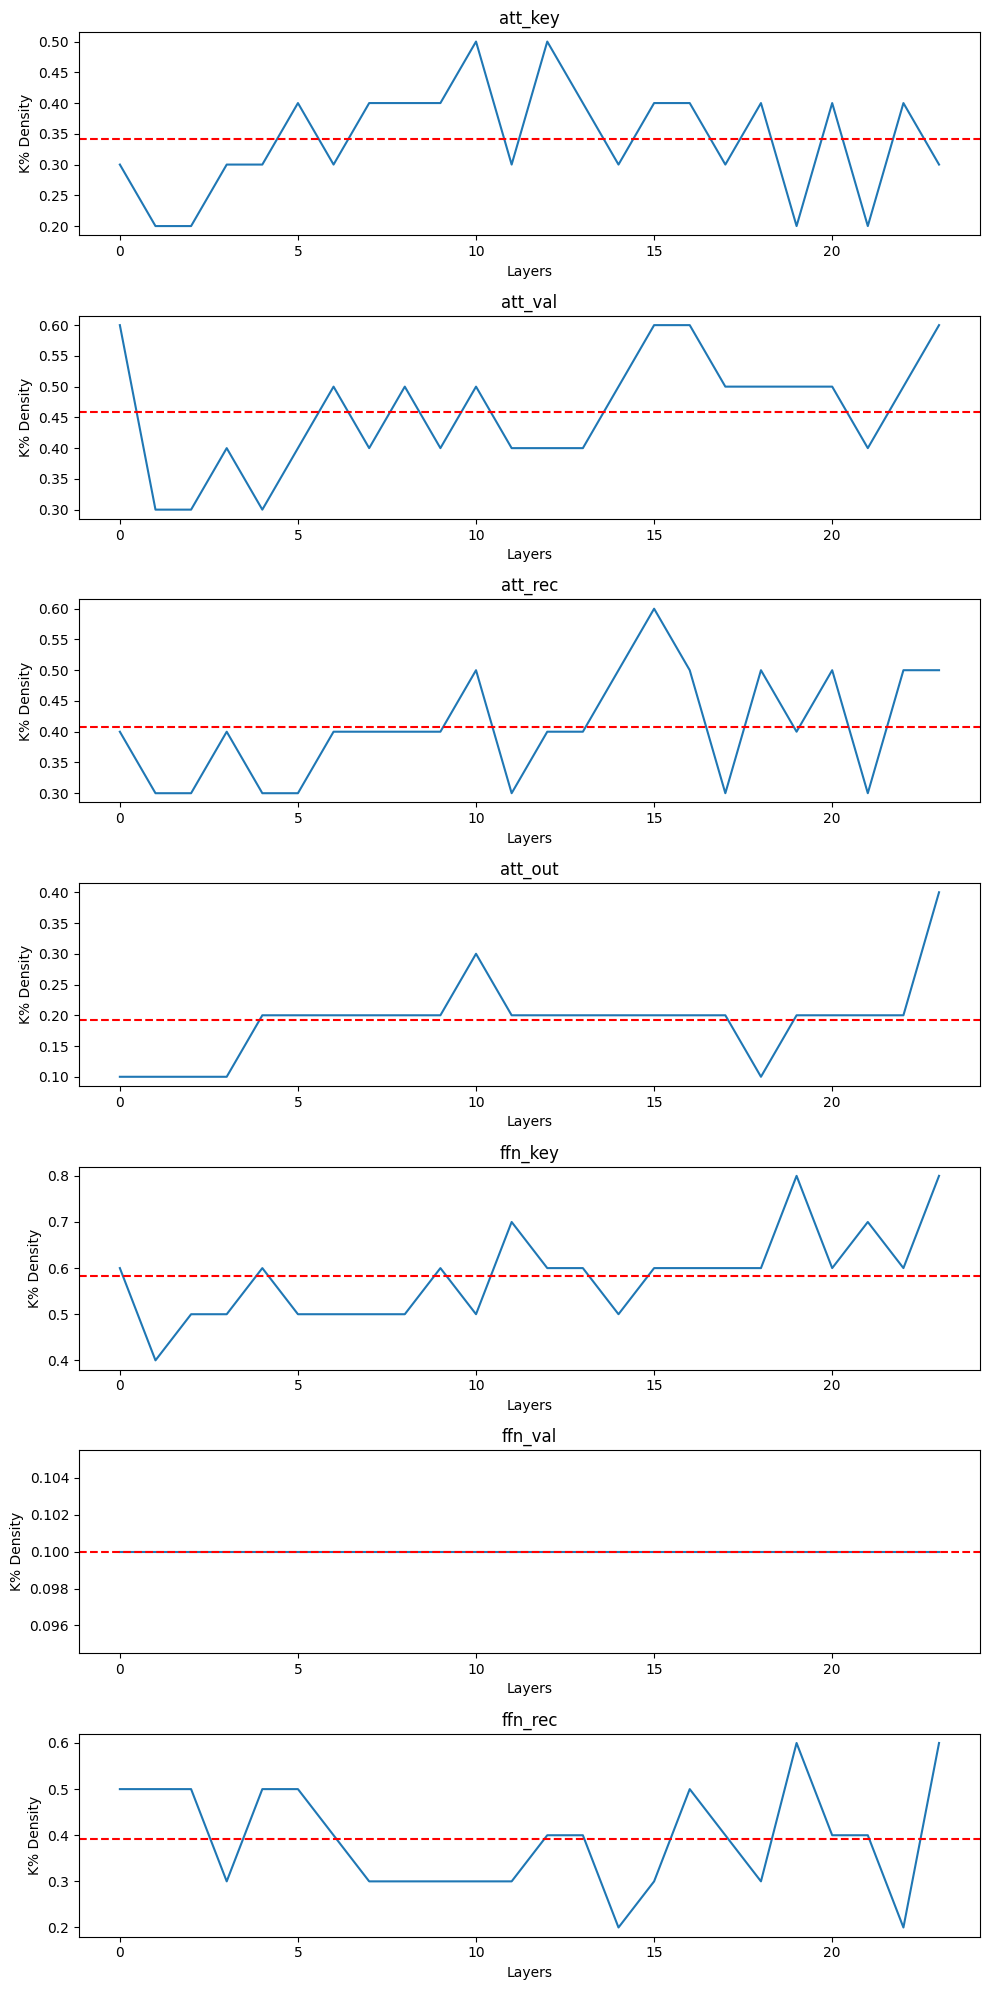

In [9]:
import matplotlib.pyplot as plt

# sp_res = {'att.sparsing_fns.key': [0.2998046875, 0.19970703125, 0.19970703125, 0.2998046875, 0.2998046875, 0.39990234375, 0.2998046875, 0.39990234375, 0.39990234375, 0.39990234375, 0.5, 0.2998046875, 0.5, 0.39990234375, 0.2998046875, 0.39990234375, 0.39990234375, 0.2998046875, 0.39990234375, 0.19970703125, 0.39990234375, 0.19970703125, 0.39990234375, 0.2998046875],
#           'att.sparsing_fns.val': [0.599609375, 0.2998046874375, 0.3999023435, 0.2998046875, 0.39990234375, 0.2998046875, 0.39990234375, 0.5, 0.39990234375, 0.5, 0.39990234375, 0.5, 0.39990234375, 0.39990234375, 70703125, 0.39990234375, 0.5, 0.599609375, 0.599609375, 0.5, 0.5, 0.5, 0.5, 0.39990234375, 0.5, 0.599609375]}

# sp_res = {'att.sparsing_fns.key': [0.3994140625, 0.3994140625, 0.2998046875, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2998046875, 0.5, 0.3994140625, 0.3994140625, 0.3994140625, 0.3994140625, 0.5, 0.3994140625, 0.2998046875, 0.3994140625, 0.19921875, 0.3994140625, 0.3994140625, 0.2998046875, 0.3994140625, 0.2998046875], 'att.sparsing_fns.val': [0.599609375, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.599609375, 0.5, 0.599609375, 0.599609375, 0.3994140625, 0.5, 0.3994140625, 0.3994140625, 0.3994140625, 0.5, 0.599609375, 0.599609375, 0.5, 0.3994140625, 0.599609375, 0.5, 0.599609375], 'att.sparsing_fns.rec': [0.5, 0.599609375, 0.3994140625, 0.5, 0.599609375, 0.3994140625, 0.5, 0.5, 0.3994140625, 0.3994140625, 0.5, 0.5, 0.3994140625, 0.3994140625, 0.3994140625, 0.5, 0.5, 0.5, 0.3994140625, 0.5, 0.3994140625, 0.2998046875, 0.5, 0.3994140625], 'att.sparsing_fns.out': [0.2998046875, 0.19921875, 0.19921875, 0.099609375, 0.19921875, 0.19921875, 0.2998046875, 0.19921875, 0.19921875, 0.2998046875, 0.3994140625, 0.099609375, 0.099609375, 0.099609375, 0.099609375, 0.099609375, 0.099609375, 0.2998046875, 0.19921875, 0.099609375, 0.19921875, 0.19921875, 0.099609375, 0.2998046875], 'ffn.sparsing_fns.key': [0.69921875, 0.599609375, 0.69921875, 0.69921875, 0.7998046875, 0.69921875, 0.69921875,0.599609375, 0.7998046875, 0.599609375, 0.599609375, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.599609375, 0.69921875, 0.69921875, 0.599609375, 0.599609375, 0.69921875, 0.69921875, 0.8994140625], 'ffn.sparsing_fns.val': [0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625, 0.099853515625], 'ffn.sparsing_fns.rec': [0.599609375, 0.5, 0.2998046875, 0.3994140625,0.3994140625, 0.2998046875, 0.3994140625, 0.2998046875, 0.3994140625, 0.2998046875, 0.3994140625, 0.19921875, 0.19921875, 0.2998046875, 0.2998046875, 0.3994140625, 0.19921875, 0.5, 0.2998046875, 0.19921875, 0.3994140625, 0.2998046875, 0.2998046875,0.69921875]}
sp_res = {'att_key': [0.3, 0.2, 0.2, 0.3, 0.3, 0.4, 0.3, 0.4, 0.4, 0.4, 0.5, 0.3, 0.5, 0.4, 0.3, 0.4, 0.4, 0.3, 0.4, 0.2, 0.4, 0.2, 0.4, 0.3], 'att_val': [0.6, 0.3, 0.3, 0.4, 0.3, 0.4, 0.5, 0.4, 0.5, 0.4, 0.5, 0.4, 0.4, 0.4, 0.5, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.5, 0.6], 'att_rec': [0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.3, 0.4, 0.4, 0.5, 0.6, 0.5, 0.3, 0.5, 0.4, 0.5, 0.3, 0.5, 0.5], 'att_out': [0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0.4], 'ffn_key': [0.6, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.7, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.8, 0.6, 0.7, 0.6, 0.8], 'ffn_val': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'ffn_rec': [0.5, 0.5, 0.5, 0.3, 0.5, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.2, 0.3, 0.5, 0.4, 0.3, 0.6, 0.4, 0.4, 0.2, 0.6]}
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(sp_res), 1, figsize=(10, 20))

layer_num = len(sp_res['att_key'])
layers = range(layer_num)
for i, (key, value) in enumerate(sp_res.items()):
    axs[i].plot(layers, value)
    axs[i].axhline(y=sum(value) / len(value), color='r', linestyle='--')
    axs[i].set_xlabel('Layers')
    axs[i].set_ylabel('K% Density')
    axs[i].set_title(key)

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
def calc_dif(init_val, end_val):
    return int(abs(init_val - end_val) * 10) + 1

sp_res = {'att_key': [0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.4, 0.5, 0.4, 0.3, 0.6, 0.4, 0.3, 0.5, 0.4, 0.4, 0.4, 0.3, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4], 'att_val': [0.6, 0.3, 0.4, 0.5, 0.6, 0.5, 0.6, 0.7, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.4, 0.5, 0.4, 0.6, 0.4, 0.4, 0.4, 0.6, 0.7, 0.4, 0.7, 0.5, 0.5, 0.5, 0.3, 0.9, 0.8], 'att_rec': [0.5, 0.3, 0.4, 0.6, 0.5, 0.4, 0.4, 0.6, 0.5, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.4, 0.4, 0.6, 0.6, 0.6, 0.4, 0.4, 0.6, 0.8, 0.5, 0.5, 0.5, 0.4, 0.6, 0.5, 0.9, 0.7], 'att_out': [0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.2, 0.1, 0.3, 0.2, 0.2, 0.5, 0.2, 0.2, 0.2, 0.1, 0.4, 0.2, 0.6, 0.6], 'ffn_key': [0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.8, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.9, 0.8, 0.8], 'ffn_val': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'ffn_rec': [0.5, 0.5, 0.5, 0.5, 0.3, 0.6, 0.5, 0.4, 0.5, 0.5, 0.4, 0.3, 0.4, 0.4, 0.5, 0.5, 0.3, 0.3, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.3, 0.3, 0.6, 0.6, 0.4, 0.6, 0.8]}
layer_num = len(sp_res[list(sp_res.keys())[0]])

mode='old'
total_op = 0
for i in range(layer_num):
    for key, value in sp_res.items():
        if i == 0 or mode == 'old':
            total_op += calc_dif(1.0, value[i])
        else:
            values, counts = np.unique(value[:i], return_counts=True)
            init_val = values[np.argmax(counts)]
            total_op += calc_dif(init_val, value[i]) + 1
print(total_op)

1529


In [14]:
import numpy as np

init_list = np.arange(1.0, 0.0, -0.1)

random_list = np.random.choice(np.arange(1.0, 0.0, -0.1), size=50)
print(random_list)

values, counts = np.unique(random_list, return_counts=True)
print(values, counts)
print('ind in init list', )


[0.1 0.5 0.4 0.3 0.4 0.6 0.4 0.8 0.4 0.4 0.5 0.6 0.5 0.9 0.9 0.1 0.5 0.6
 0.9 0.6 0.3 1.  0.7 0.8 0.7 0.8 0.1 1.  1.  0.2 0.8 0.3 0.2 0.3 0.8 0.2
 0.1 1.  0.3 0.5 0.6 1.  0.6 1.  0.7 0.7 1.  0.1 0.1 0.1]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [7 3 5 5 5 6 4 5 3 7]
ind in init list


## 3B_topk-start_0.9-step_linear-loss_inc_1.0005

qkv_avg: 52.0 down_proj: 38.0 up_proj: 90.0


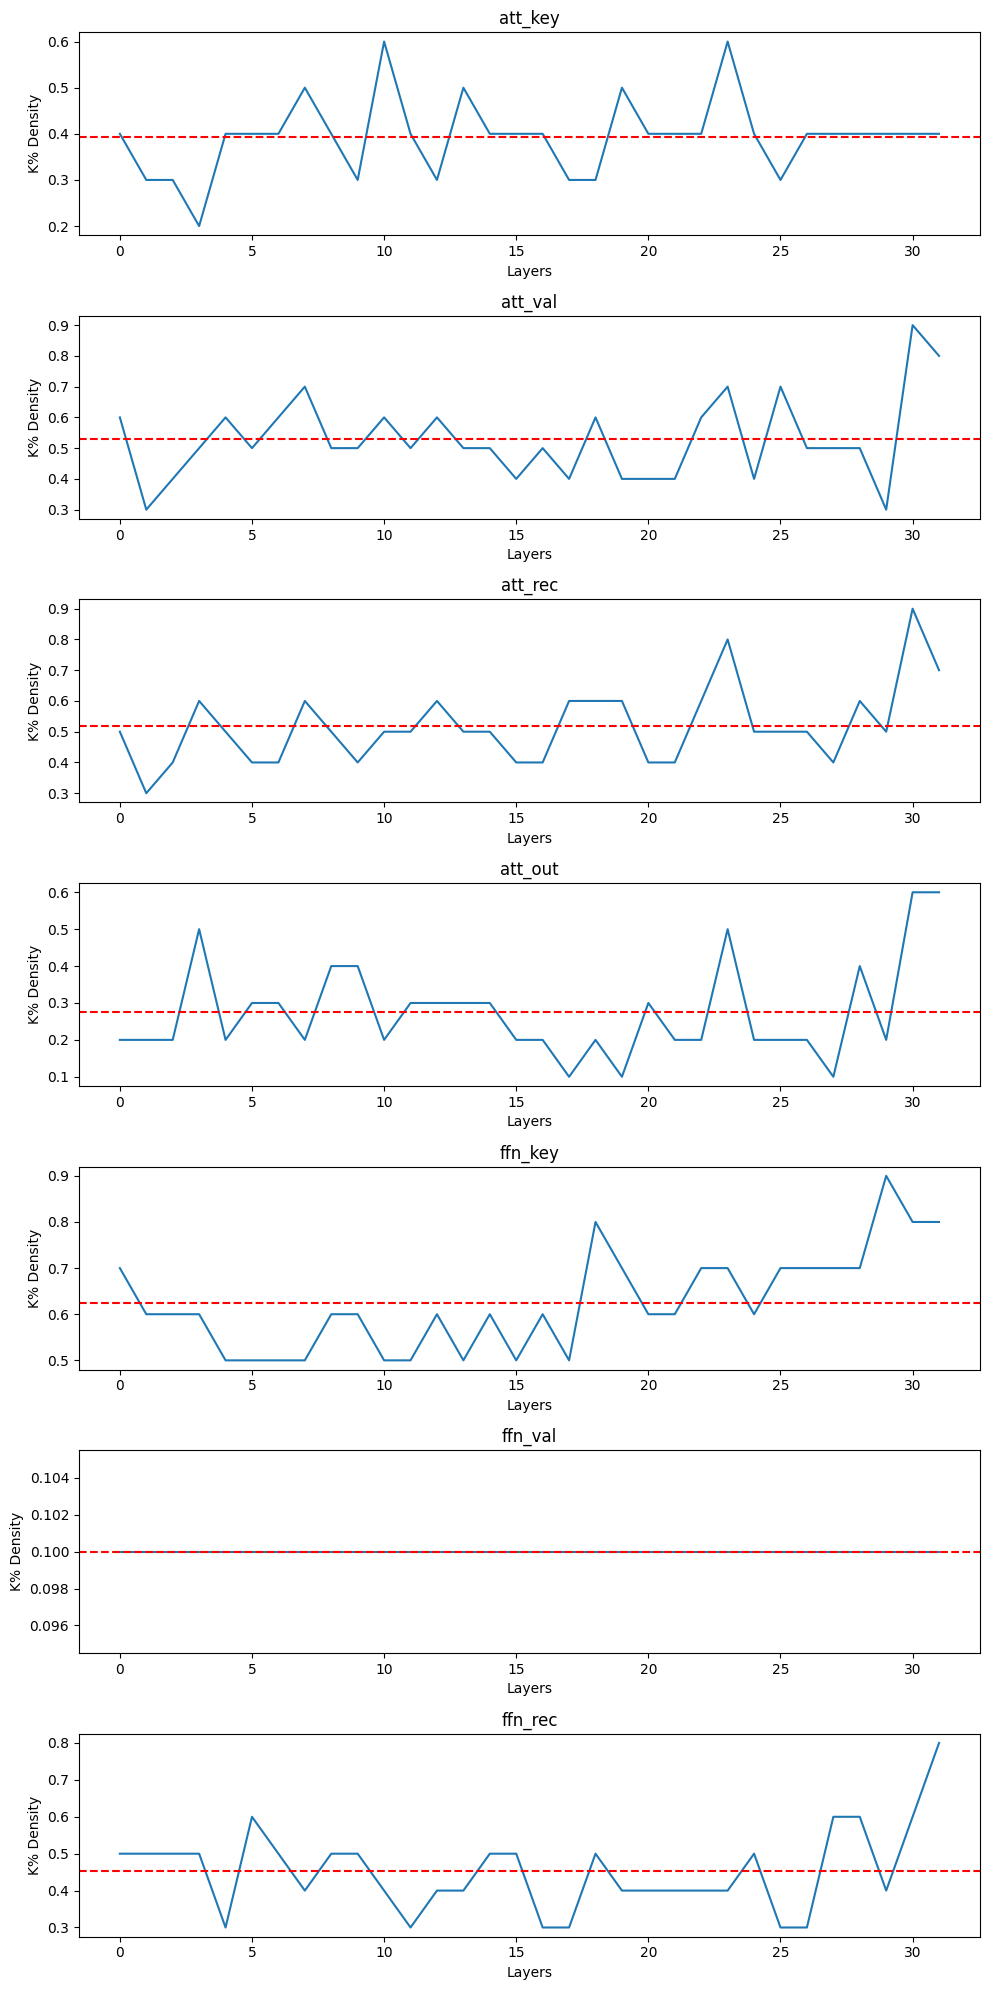

In [4]:
# RWKV-4-Pile-3B_sparse_topk-start_0.9-step_linear-loss_inc_1.0005_hs
import numpy as np
def plot_k_by_layer(sp_res):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(len(sp_res), 1, figsize=(10, 20))

    layer_num = len(sp_res['att_key'])
    layers = range(layer_num)
    for i, (key, value) in enumerate(sp_res.items()):
        axs[i].plot(layers, value)
        axs[i].axhline(y=sum(value) / len(value), color='r', linestyle='--')
        axs[i].set_xlabel('Layers')
        axs[i].set_ylabel('K% Density')
        axs[i].set_title(key)

    plt.tight_layout()
    plt.show()

sp_res = {'att_key': [0.4, 0.3, 0.3, 0.2, 0.4, 0.4, 0.4, 0.5, 0.4, 0.3, 0.6, 0.4, 0.3, 0.5, 0.4, 0.4, 0.4, 0.3, 0.3, 0.5, 0.4, 0.4, 0.4, 0.6, 0.4, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4], 'att_val': [0.6, 0.3, 0.4, 0.5, 0.6, 0.5, 0.6, 0.7, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.4, 0.5, 0.4, 0.6, 0.4, 0.4, 0.4, 0.6, 0.7, 0.4, 0.7, 0.5, 0.5, 0.5, 0.3, 0.9, 0.8], 'att_rec': [0.5, 0.3, 0.4, 0.6, 0.5, 0.4, 0.4, 0.6, 0.5, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.4, 0.4, 0.6, 0.6, 0.6, 0.4, 0.4, 0.6, 0.8, 0.5, 0.5, 0.5, 0.4, 0.6, 0.5, 0.9, 0.7], 'att_out': [0.2, 0.2, 0.2, 0.5, 0.2, 0.3, 0.3, 0.2, 0.4, 0.4, 0.2, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.2, 0.1, 0.3, 0.2, 0.2, 0.5, 0.2, 0.2, 0.2, 0.1, 0.4, 0.2, 0.6, 0.6], 'ffn_key': [0.7, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.6, 0.5, 0.8, 0.7, 0.6, 0.6, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.9, 0.8, 0.8], 'ffn_val': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'ffn_rec': [0.5, 0.5, 0.5, 0.5, 0.3, 0.6, 0.5, 0.4, 0.5, 0.5, 0.4, 0.3, 0.4, 0.4, 0.5, 0.5, 0.3, 0.3, 0.5, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.3, 0.3, 0.6, 0.6, 0.4, 0.6, 0.8]}
qkv_avg = np.mean([sum(sp_res['att_key']) / len(sp_res['att_key']), sum(sp_res['att_val']) / len(sp_res['att_val']), sum(sp_res['att_rec']) / len(sp_res['att_rec'])])
print('qkv_avg:', np.round(1 - qkv_avg, 2) * 100, 'down_proj:', np.round(1 - np.mean(sp_res['ffn_key']), 2) * 100, 'up_proj:', (1 - np.mean(sp_res['ffn_val'])) * 100)
plot_k_by_layer(sp_res)

## 3B_topk-start_0.2-step_exp8


qkv_avg: 11.0 down_proj: 0.0 up_proj: 97.03125


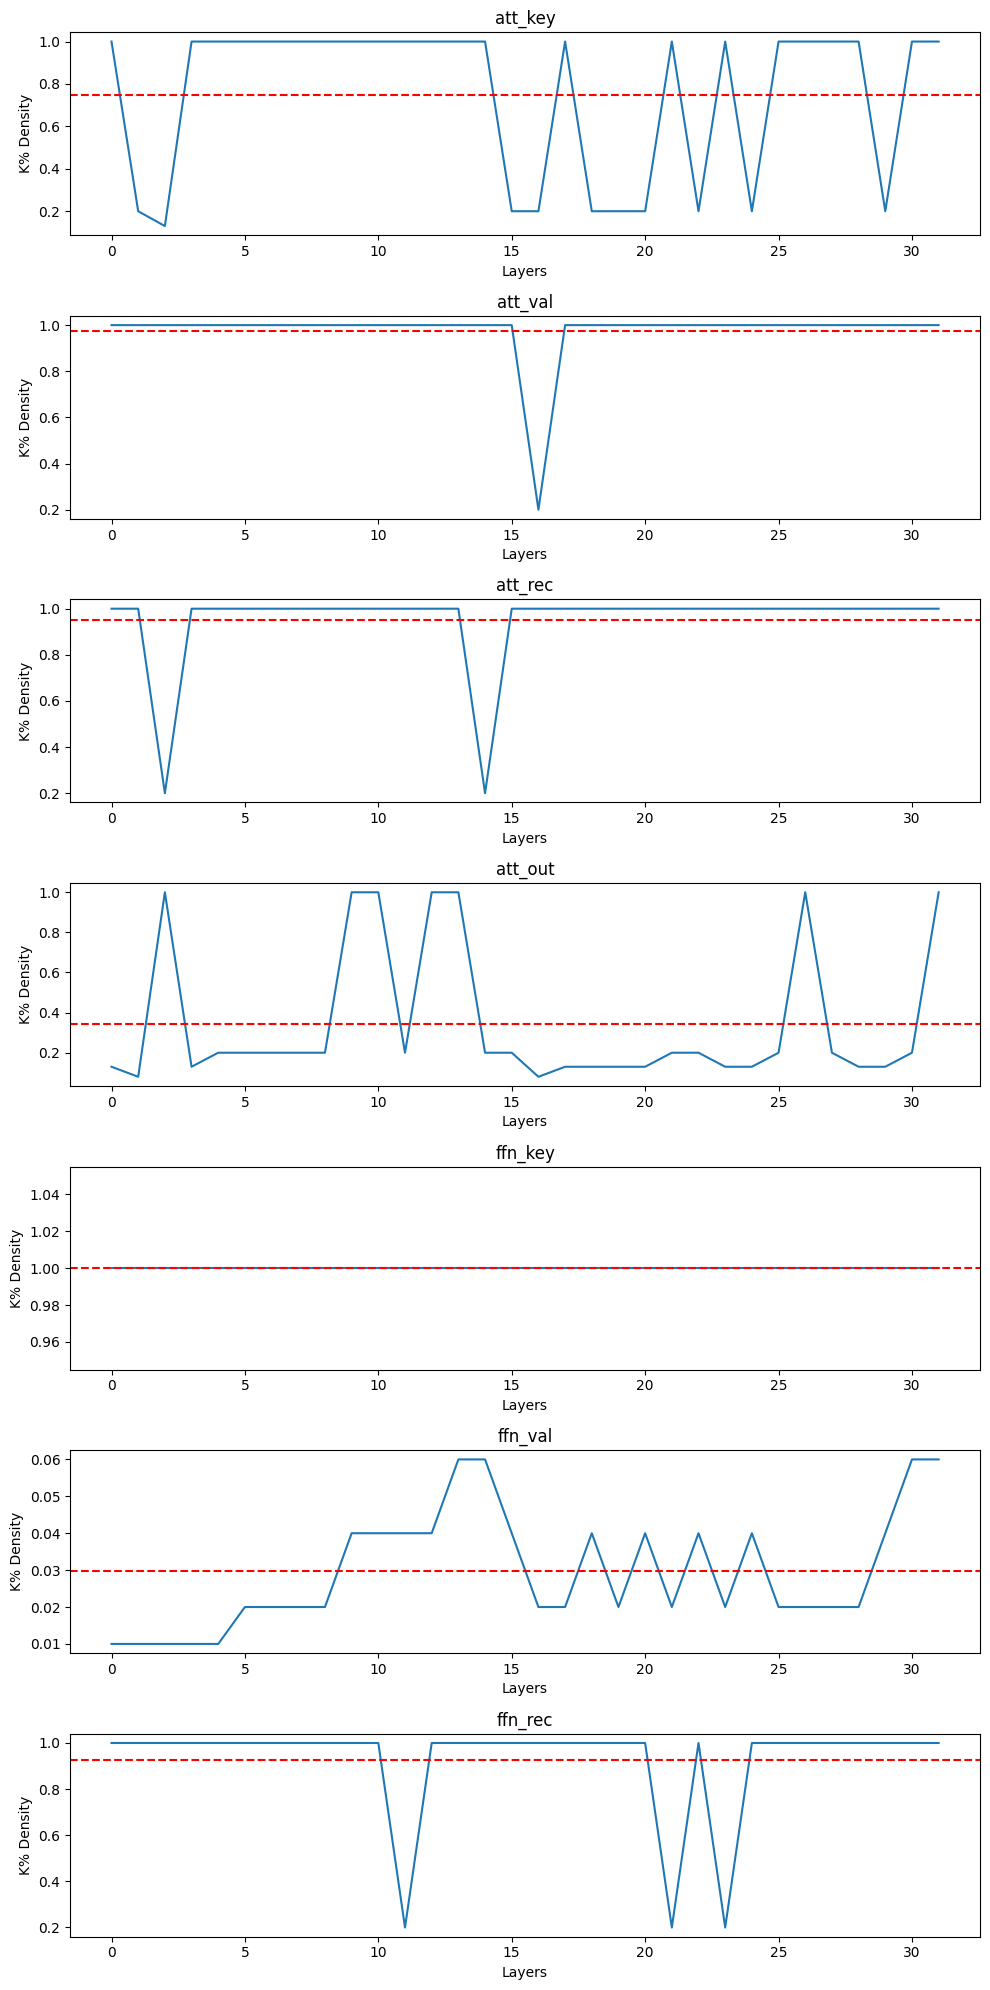

In [5]:
# RWKV-4-Pile-3B_sparse_topk-start_0.2-step_exp8

sp_res = {'att_key': [1.0, 0.2, 0.13, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 0.2, 1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0], 'att_val': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'att_rec': [1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'att_out': [0.13, 0.08, 1.0, 0.13, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 0.2, 0.08, 0.13, 0.13, 0.13, 0.13, 0.2, 0.2, 0.13, 0.13, 0.2, 1.0, 0.2, 0.13, 0.13, 0.2, 1.0], 'ffn_key': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'ffn_val': [0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04, 0.06, 0.06, 0.04, 0.02, 0.02, 0.04, 0.02, 0.04, 0.02, 0.04, 0.02, 0.04, 0.02, 0.02, 0.02, 0.02, 0.04, 0.06, 0.06], 'ffn_rec': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
qkv_avg = np.mean([sum(sp_res['att_key']) / len(sp_res['att_key']), sum(sp_res['att_val']) / len(sp_res['att_val']), sum(sp_res['att_rec']) / len(sp_res['att_rec'])])
print('qkv_avg:', np.round(1 - qkv_avg, 2) * 100, 'down_proj:', np.round(1 - np.mean(sp_res['ffn_key']), 2) * 100, 'up_proj:', (1 - np.mean(sp_res['ffn_val'])) * 100)
plot_k_by_layer(sp_res)

In [4]:
a = '/mnt/space/ivan/transformers/opt/metaseq/test_run_dir/models/opt-baseline-1.3b.pt'
a.split('/')[-1].split('.pt')[0]

''

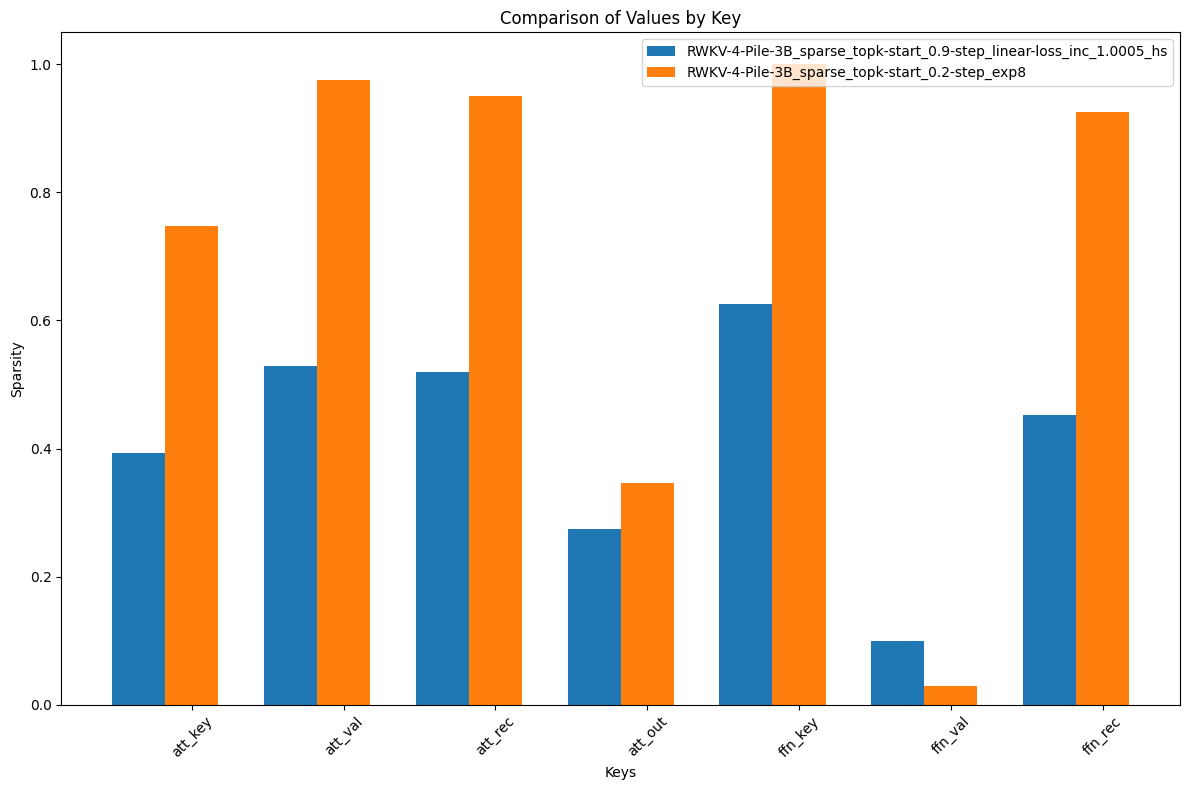

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sparsities = [
    {'att_key': 0.39375000000000004, 'att_val': 0.528125, 'att_rec': 0.51875, 'att_out': 0.275, 'ffn_key': 0.625, 'ffn_val': 0.1, 'ffn_rec': 0.453125},
    {'att_key': 0.7478125, 'att_val': 0.975, 'att_rec': 0.95, 'att_out': 0.345625, 'ffn_key': 1.0, 'ffn_val': 0.029687500000000002, 'ffn_rec': 0.925}
]

model_names = ['RWKV-4-Pile-3B_sparse_topk-start_0.9-step_linear-loss_inc_1.0005_hs', 'RWKV-4-Pile-3B_sparse_topk-start_0.2-step_exp8']
n_models = len(model_names)

# Keys and values
keys = list(sparsities[0].keys())
values = [list(d.values()) for d in sparsities]

# X locations for the groups
x = np.arange(len(keys))

# Width of the bars
width = 0.8 / n_models

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
for i, value_set in enumerate(values):
    ax.bar(x + (i - n_models / 2) * width, value_set, width, label=f'{model_names[i]}')


# Labels and title
ax.set_xlabel('Keys')
ax.set_ylabel('Sparsity')
ax.set_title('Comparison of Values by Key')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

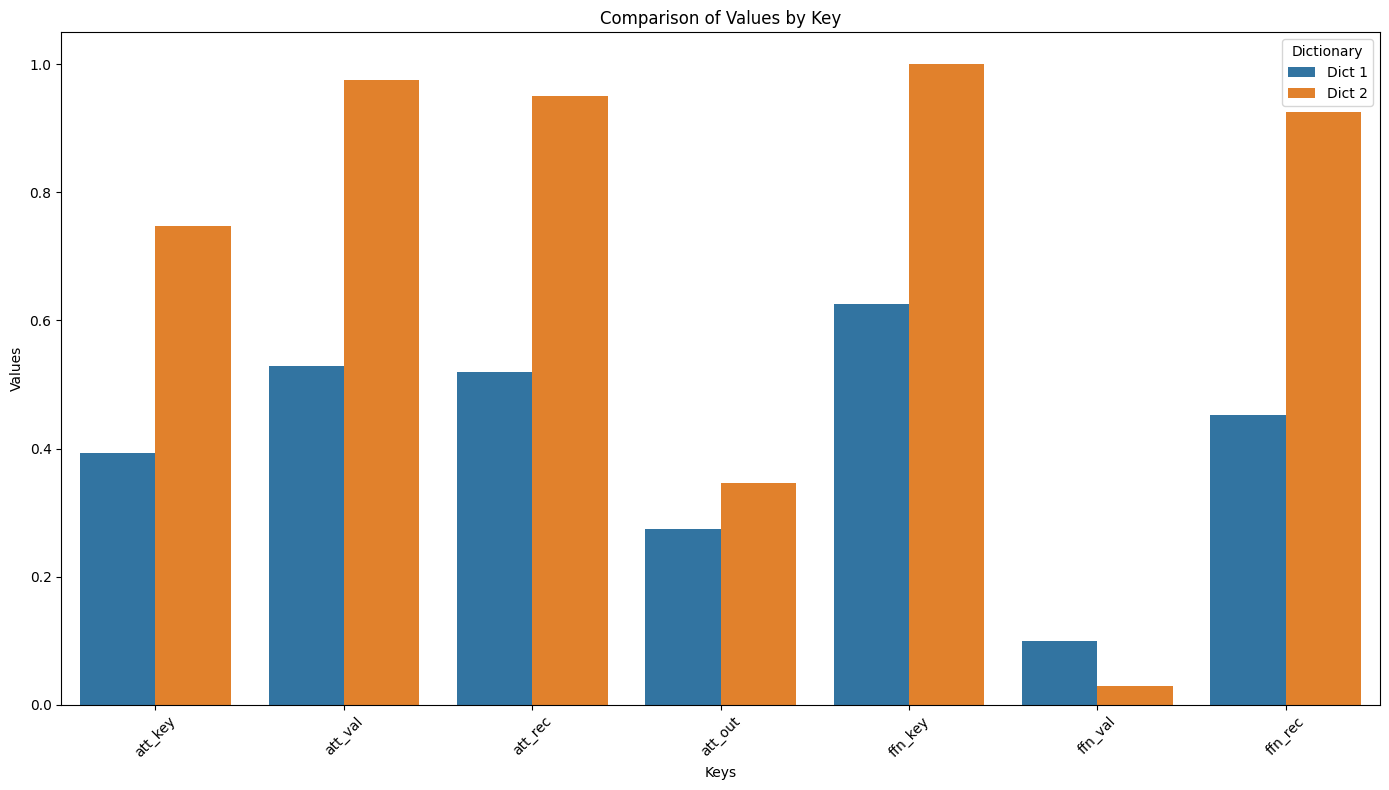

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of dictionaries to compare
dicts = [
    {'att_key': 0.39375000000000004, 'att_val': 0.528125, 'att_rec': 0.51875, 'att_out': 0.275, 'ffn_key': 0.625, 'ffn_val': 0.1, 'ffn_rec': 0.453125},
    {'att_key': 0.7478125, 'att_val': 0.975, 'att_rec': 0.95, 'att_out': 0.345625, 'ffn_key': 1.0, 'ffn_val': 0.029687500000000002, 'ffn_rec': 0.925},
    # Add more dictionaries here if needed
]

# Prepare data for plotting
data = []
for i, d in enumerate(dicts):
    for k, v in d.items():
        data.append({'Key': k, 'Value': v, 'Dictionary': f'Dict {i+1}'})

# Convert to DataFrame
df = pd.DataFrame(data)

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create a barplot
sns.barplot(x='Key', y='Value', hue='Dictionary', data=df)

# Labels and title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Comparison of Values by Key')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## 3B models

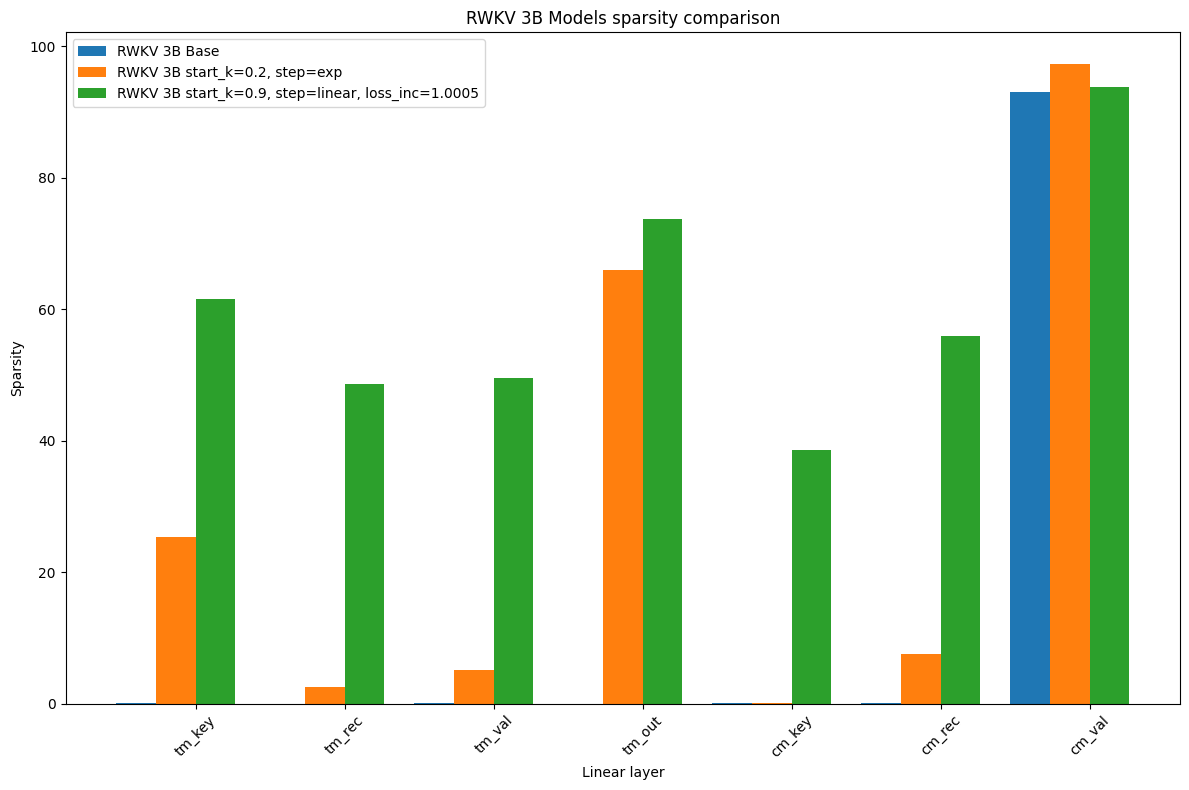

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sparsities = [
    {'tm_key': 0.02163795189699158, 'tm_rec': 0.01033968869887758, 'tm_val': 0.030278251448180526, 'tm_out': 5.510784428786053e-08, 'cm_key': 0.017092625981604215, 'cm_rec': 0.015252193737978814, 'cm_val': 93.02227330207825},
    {'tm_key': 25.316844745422713, 'tm_val': 2.5620211237110198, 'tm_rec': 5.051081273704767, 'tm_out': 65.98374021530617, 'cm_key': 0.04439546272624284, 'cm_rec': 7.579370803083293, 'cm_val': 97.23941493034363},
    {'tm_key': 61.61150026321411, 'tm_val': 48.65453541278839, 'tm_rec': 49.534869849681854, 'tm_out': 73.70790505409241, 'cm_key': 38.5592827796936, 'cm_rec': 55.90648037195206, 'cm_val': 93.72236633300781}
]

model_names = ['RWKV 3B Base', 
               'RWKV 3B start_k=0.2, step=exp',
                'RWKV 3B start_k=0.9, step=linear, loss_inc=1.0005',]
n_models = len(model_names)

# Keys and values
keys = list(sparsities[0].keys())
values = [list(d.values()) for d in sparsities]

# X locations for the groups
x = np.arange(len(keys))

# Width of the bars
width = 0.8 / n_models

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
for i, value_set in enumerate(values):
    ax.bar(x + (i - n_models / 2) * width, value_set, width, label=f'{model_names[i]}')


# Labels and title
ax.set_xlabel('Linear layer')
ax.set_ylabel('Sparsity')
ax.set_title('RWKV 3B Models sparsity comparison')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

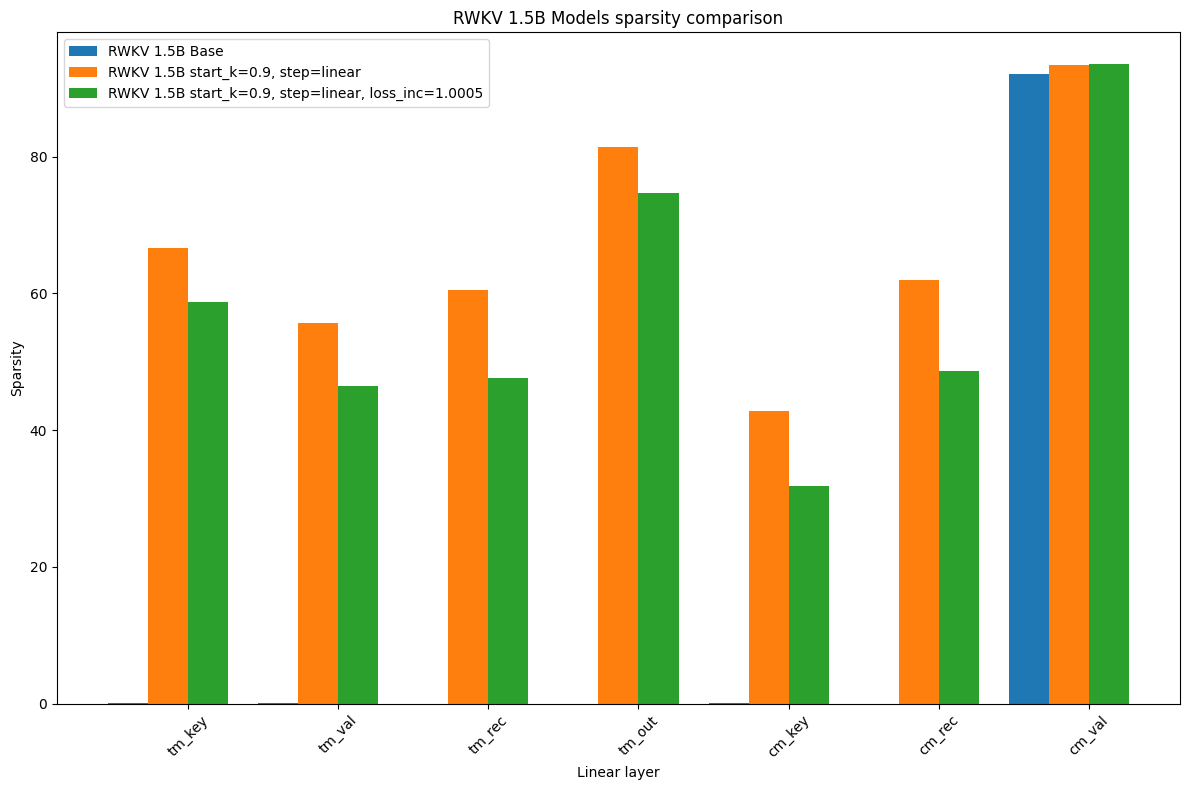

In [16]:
import numpy as np
import matplotlib.pyplot as plt

sparsities = [
    {'tm_key': 0.021187581936828792, 'tm_val': 0.02328980655875057, 'tm_rec': 0.01133638604854544, 'tm_out': 3.526902029686122e-08, 'cm_key': 0.019000444357516244, 'cm_rec': 0.013153587225436544, 'cm_val': 92.13125419616699},
    {'tm_key': 66.66246795654297, 'tm_val': 55.66473070780436, 'tm_rec': 60.42744127909342, 'tm_out': 81.42974901199341, 'cm_key': 42.83225075403849, 'cm_rec': 62.009945710500084, 'cm_val': 93.4109935760498},
    {'tm_key': 58.79666153589884, 'tm_val': 46.48344667752584, 'tm_rec': 47.634881178538, 'tm_out': 74.66416994730632, 'cm_key': 31.766772588094074, 'cm_rec': 48.71523221333822, 'cm_val': 93.50323263804118},
]

model_names = ['RWKV 1.5B Base', 
               'RWKV 1.5B start_k=0.9, step=linear',
                'RWKV 1.5B start_k=0.9, step=linear, loss_inc=1.0005',]
n_models = len(model_names)

# Keys and values
keys = list(sparsities[0].keys())
values = [list(d.values()) for d in sparsities]

# X locations for the groups
x = np.arange(len(keys))

# Width of the bars
width = 0.8 / n_models

fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
for i, value_set in enumerate(values):
    ax.bar(x + (i - n_models / 2) * width, value_set, width, label=f'{model_names[i]}')


# Labels and title
ax.set_xlabel('Linear layer')
ax.set_ylabel('Sparsity')
ax.set_title('RWKV 1.5B Models sparsity comparison')
ax.set_xticks(x)
ax.set_xticklabels(keys)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
results = {'5_att_tm_key': 0.022992191836237907, '5_att_tm_val': 0.024033332243561745, '5_att_tm_rec': 0.013083959929645061, '5_att_tm_out': 0.0, '5_ffn_cm_key': 0.038468413054943085, '5_ffn_cm_rec': 0.039673347026109695, '5_ffn_cm_val': 97.86649322509766, '6_att_tm_key': 0.023374507203698158, '6_att_tm_val': 0.024455081671476364, '6_att_tm_rec': 0.01280738040804863, '6_att_tm_out': 0.0, '6_ffn_cm_key': 0.03623369708657265, '6_ffn_cm_rec': 0.02926097996532917, '6_ffn_cm_val': 97.15057373046875, '7_att_tm_key': 0.024064723402261734, '7_att_tm_val': 0.026038695126771927, '7_att_tm_rec': 0.011893242597579956, '7_att_tm_out': 0.0, '7_ffn_cm_key': 0.029823027551174164, '7_ffn_cm_rec': 0.020517893135547638, '7_ffn_cm_val': 96.18611145019531, '8_att_tm_key': 0.02496972680091858, '8_att_tm_val': 0.023745855316519737, '8_att_tm_rec': 0.01091696135699749, '8_att_tm_out': 0.0, '8_ffn_cm_key': 0.01685580611228943, '8_ffn_cm_rec': 0.010923415422439575, '8_ffn_cm_val': 94.16627502441406, '9_att_tm_key': 0.025522321462631226, '9_att_tm_val': 0.023006193339824677, '9_att_tm_rec': 0.011003863997757435, '9_att_tm_out': 0.0, '9_ffn_cm_key': 0.012031884863972664, '9_ffn_cm_rec': 0.008899573236703873, '9_ffn_cm_val': 92.74004364013672, '10_att_tm_key': 0.02614227868616581, '10_att_tm_val': 0.02427573688328266, '10_att_tm_rec': 0.011327951215207577, '10_att_tm_out': 0.0, '10_ffn_cm_key': 0.014508899301290512, '10_ffn_cm_rec': 0.009779570624232292, '10_ffn_cm_val': 91.39572143554688, '11_att_tm_key': 0.026221703737974167, '11_att_tm_val': 0.02534516528248787, '11_att_tm_rec': 0.011196150444447994, '11_att_tm_out': 3.5269021481099116e-08, '11_ffn_cm_key': 0.016016613692045212, '11_ffn_cm_rec': 0.00912557728588581, '11_ffn_cm_val': 89.5841064453125, '12_att_tm_key': 0.026091881096363068, '12_att_tm_val': 0.031009158119559288, '12_att_tm_rec': 0.01087432075291872, '12_att_tm_out': 0.0, '12_ffn_cm_key': 0.016602609306573868, '12_ffn_cm_rec': 0.009521224536001682, '12_ffn_cm_val': 88.34762573242188, '13_att_tm_key': 0.024777192622423172, '13_att_tm_val': 0.03553752228617668, '13_att_tm_rec': 0.010859719477593899, '13_att_tm_out': 0.0, '13_ffn_cm_key': 0.013643891550600529, '13_ffn_cm_rec': 0.008475145325064659, '13_ffn_cm_val': 86.4712142944336, '14_att_tm_key': 0.025072216987609863, '14_att_tm_val': 0.028237083926796913, '14_att_tm_rec': 0.009443209506571293, '14_att_tm_out': 0.0, '14_ffn_cm_key': 0.011745888739824295, '14_ffn_cm_rec': 0.008738640695810318, '14_ffn_cm_val': 85.7709732055664, '15_att_tm_key': 0.01857950910925865, '15_att_tm_val': 0.025678597390651703, '15_att_tm_rec': 0.006237326189875603, '15_att_tm_out': 0.0, '15_ffn_cm_key': 0.015698453411459923, '15_ffn_cm_rec': 0.008953957818448544, '15_ffn_cm_val': 89.97450256347656, '16_att_tm_key': 0.018593262881040573, '16_att_tm_val': 0.02515975758433342, '16_att_tm_rec': 0.006734231486916542, '16_att_tm_out': 0.0, '16_ffn_cm_key': 0.019012082368135452, '16_ffn_cm_rec': 0.011092495173215866, '16_ffn_cm_val': 91.4290542602539, '17_att_tm_key': 0.01942649483680725, '17_att_tm_val': 0.02549569308757782, '17_att_tm_rec': 0.007305977400392294, '17_att_tm_out': 0.0, '17_ffn_cm_key': 0.018395863473415375, '17_ffn_cm_rec': 0.009609009139239788, '17_ffn_cm_val': 92.2055892944336, '18_att_tm_key': 0.020442770794034004, '18_att_tm_val': 0.023552194237709045, '18_att_tm_rec': 0.007664346136152744, '18_att_tm_out': 0.0, '18_ffn_cm_key': 0.016156703233718872, '18_ffn_cm_rec': 0.009515405632555485, '18_ffn_cm_val': 92.87064361572266, '19_att_tm_key': 0.020703444257378578, '19_att_tm_val': 0.02117403782904148, '19_att_tm_rec': 0.008254749700427055, '19_att_tm_out': 0.0, '19_ffn_cm_key': 0.014619819819927216, '19_ffn_cm_rec': 0.009544996544718742, '19_ffn_cm_val': 92.98699188232422, '20_att_tm_key': 0.021471815183758736, '20_att_tm_val': 0.019548842683434486, '20_att_tm_rec': 0.008421571925282478, '20_att_tm_out': 0.0, '20_ffn_cm_key': 0.011736154556274414, '20_ffn_cm_rec': 0.008416704833507538, '20_ffn_cm_val': 92.48136901855469, '21_att_tm_key': 0.0203829538077116, '21_att_tm_val': 0.024360910058021545, '21_att_tm_rec': 0.007316417060792446, '21_att_tm_out': 0.0, '21_ffn_cm_key': 0.012925391085445881, '21_ffn_cm_rec': 0.008496271446347237, '21_ffn_cm_val': 93.01986694335938, '22_att_tm_key': 0.019196469336748123, '22_att_tm_val': 0.032779060304164886, '22_att_tm_rec': 0.0072797019965946674, '22_att_tm_out': 0.0, '22_ffn_cm_key': 0.012732398696243763, '22_ffn_cm_rec': 0.008087503723800182, '22_ffn_cm_val': 93.25518798828125, '23_att_tm_key': 0.0201950054615736, '23_att_tm_val': 0.03360668569803238, '23_att_tm_rec': 0.007365970406681299, '23_att_tm_out': 0.0, '23_ffn_cm_key': 0.010887017473578453, '23_ffn_cm_rec': 0.00703627523034811, '23_ffn_cm_val': 93.53252410888672, '24_att_tm_key': 0.02068418636918068, '24_att_tm_val': 0.0362071767449379, '24_att_tm_rec': 0.007115842308849096, '24_att_tm_out': 0.0, '24_ffn_cm_key': 0.008556053042411804, '24_ffn_cm_rec': 0.005955632776021957, '24_ffn_cm_val': 93.44755554199219, '25_att_tm_key': 0.018616823479533195, '25_att_tm_val': 0.04480248689651489, '25_att_tm_rec': 0.007278115022927523, '25_att_tm_out': 3.5269021481099116e-08, '25_ffn_cm_key': 0.00762036582455039, '25_ffn_cm_rec': 0.005006331484764814, '25_ffn_cm_val': 93.3350601196289, '26_att_tm_key': 0.017800098285079002, '26_att_tm_val': 0.05205277353525162, '26_att_tm_rec': 0.007399334572255611, '26_att_tm_out': 0.0, '26_ffn_cm_key': 0.007428713608533144, '26_ffn_cm_rec': 0.00456455210223794, '26_ffn_cm_val': 94.02388763427734, '27_att_tm_key': 0.016129687428474426, '27_att_tm_val': 0.057436197996139526, '27_att_tm_rec': 0.0068302336148917675, '27_att_tm_out': 0.0, '27_ffn_cm_key': 0.005623962730169296, '27_ffn_cm_rec': 0.003678312059491873, '27_ffn_cm_val': 93.74813079833984, '28_att_tm_key': 0.015136017464101315, '28_att_tm_val': 0.06418701261281967, '28_att_tm_rec': 0.00632987217977643, '28_att_tm_out': 0.0, '28_ffn_cm_key': 0.003465075511485338, '28_ffn_cm_rec': 0.0032760687172412872, '28_ffn_cm_val': 93.02035522460938, '29_att_tm_key': 0.014470420777797699, '29_att_tm_val': 0.06893068552017212, '29_att_tm_rec': 0.00532064912840724, '29_att_tm_out': 0.0, '29_ffn_cm_key': 0.0016287938924506307, '29_ffn_cm_rec': 0.0029117397498339415, '29_ffn_cm_val': 91.51956939697266, '30_att_tm_key': 0.013166419230401516, '30_att_tm_val': 0.037196084856987, '30_att_tm_rec': 0.005371295381337404, '30_att_tm_out': 0.0, '30_ffn_cm_key': 0.0009734954801388085, '30_ffn_cm_rec': 0.00320637715049088, '30_ffn_cm_val': 87.16007232666016, '31_att_tm_key': 0.013011693954467773, '31_att_tm_val': 0.004084046930074692, '31_att_tm_rec': 0.004675719887018204, '31_att_tm_out': 0.0, '31_ffn_cm_key': 0.0007959160138852894, '31_ffn_cm_rec': 0.0017060682876035571, '31_ffn_cm_val': 88.23002624511719}
dict_by_fun_type = {}
for k, v in results.items():
    name = '_'.join(k.split('_')[2:])
    dict_by_fun_type[name] = dict_by_fun_type.get(name, []) + [v]

for k, v in dict_by_fun_type.items():
    dict_by_fun_type[k] = sum(v) / len(v)
print(dict_by_fun_type)

{'tm_key': 0.020638363573838164, 'tm_val': 0.031923558080086005, 'tm_rec': 0.008529930151309128, 'tm_out': 2.612520109711046e-09, 'cm_key': 0.01385877746226335, 'cm_rec': 0.009850854411962684, 'cm_val': 92.07109352394387}


## Plots sparsity vs benchmarks

In [1]:
def plot_sparse_models(res_dict, model_type='RWKV'):
    import matplotlib.pyplot as plt

    colors = ['darkred', 'cornflowerblue', 'green']
    markers = ['*', 'o', 's', 'D', 'X']
    linestyles = ['dashed', 'dotted', 'dashdot', 'solid']

    fig, ax = plt.subplots(figsize=(10, 6), dpi=600)

    for i, (key, value) in enumerate(res_dict.items()):
        x = [v['Sparsity'] for v in value.values()]
        y = [v['Avg benchmarks'] for v in value.values()]
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]
        label = key

        for j, (k, v) in enumerate(value.items()):
            marker = markers[j]
            ax.scatter(x[j], y[j], marker=marker, color=color, label=f'{key} {k}')
            if 'baseline' in k.lower() or 'apple' in k.lower():
                plt.annotate(f'{key} {k}', (x[j], y[j]), textcoords="offset points", xytext=(0,10), ha='center')
            # else:
            #     plt.annotate(f'{key} ours', (x[j], y[j]), textcoords="offset points", xytext=(0,10), ha='center')
        
        if model_type == 'RWKV':
            plt.plot(x, y, linestyle=linestyles[i % len(linestyles)], color=color)
        else:
            x = [v['Sparsity'] for k, v in value.items() if 'apple' not in k.lower()]
            y = [v['Avg benchmarks'] for k, v in value.items() if 'apple' not in k.lower()]
            plt.plot(x, y, linestyle=linestyles[i % len(linestyles)], color=color)
        



    ax.set_ylabel('Average benchmarks')
    ax.set_xlabel('Sparsity')
    max_sparsity = max(max(v['Sparsity'] for v in value.values()) for value in res_dict.values())
    max_benchmarks = max(max(v['Avg benchmarks'] for v in value.values()) for value in res_dict.values())
    # ax.set_xlim(40, max_benchmarks + 5)
    # ax.set_xlim(0, max_sparsity + 10)
    ax.set_title(f'{model_type} Results')
    ax.legend(fontsize='small')
    plt.grid()
    plt.show()


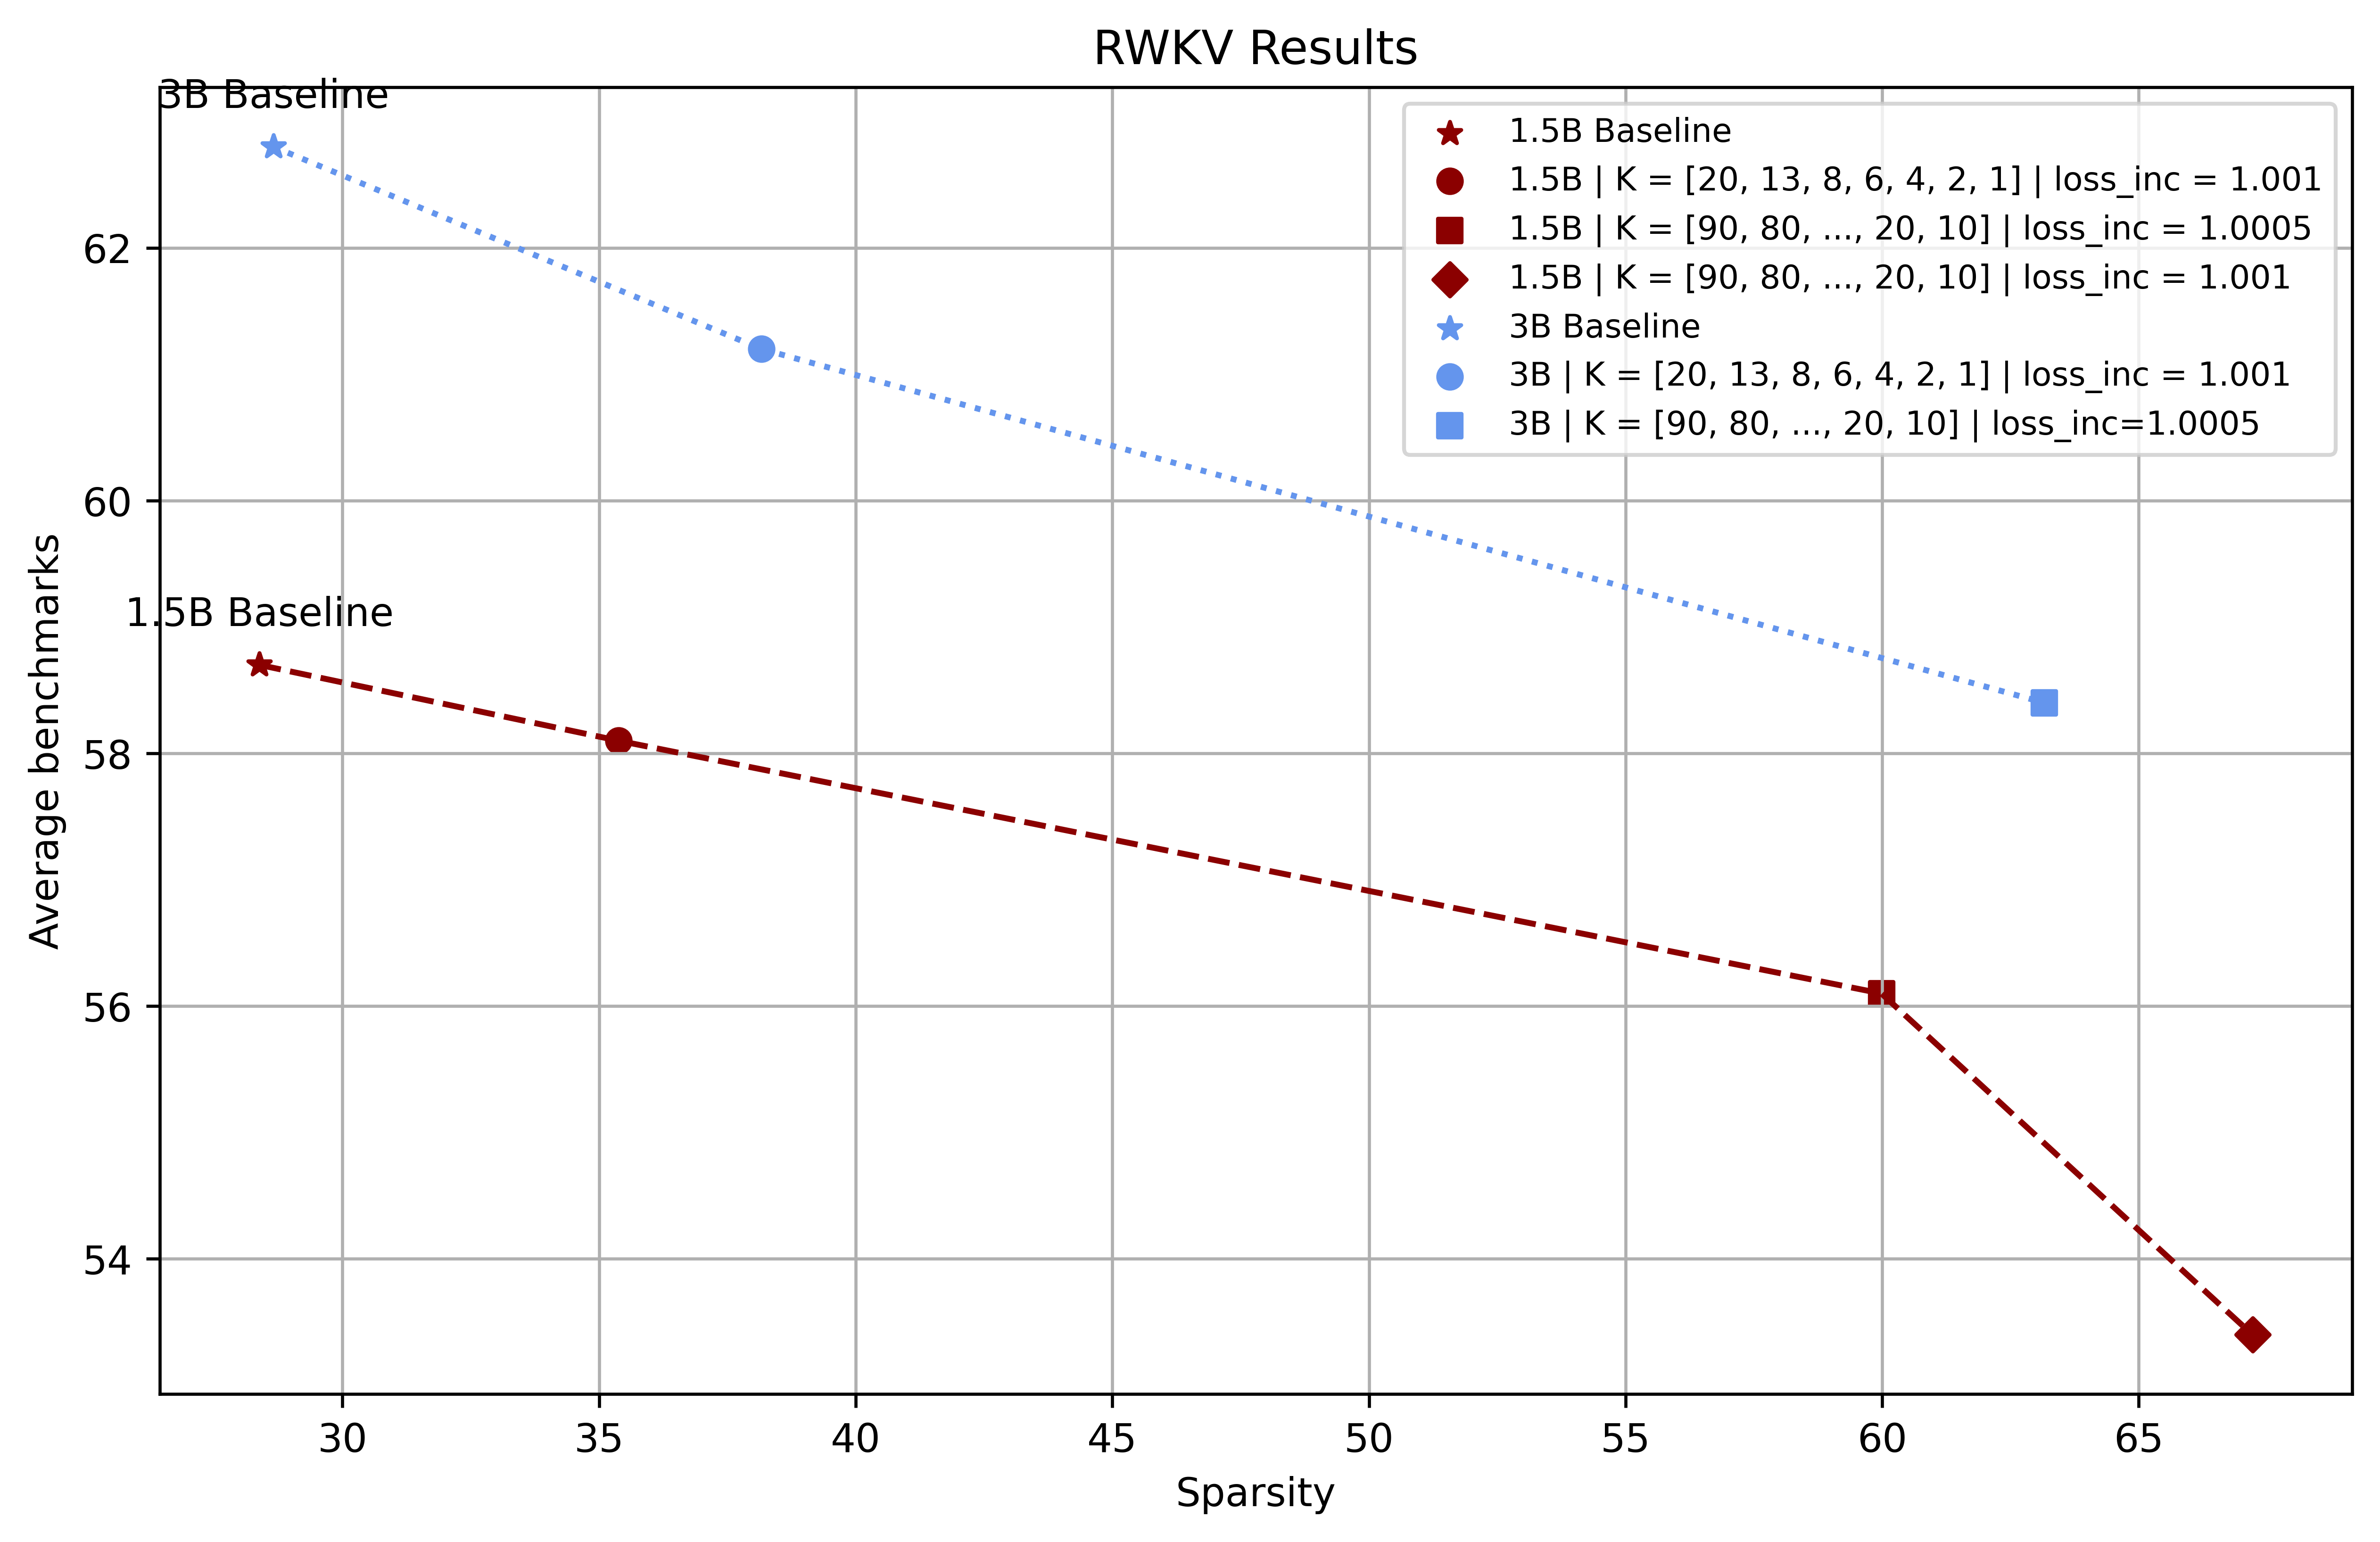

In [5]:
rwkv_results = {'1.5B': {'Baseline': {'Sparsity': 28.3815402984619, 'Avg benchmarks': 58.7}, 
                         '| K = [20, 13, 8, 6, 4, 2, 1] | loss_inc = 1.001' : {'Sparsity':35.3807106018066 , 'Avg benchmarks': 58.1},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0005' : {'Sparsity': 59.9865493774414, 'Avg benchmarks': 56.1},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.001' : {'Sparsity': 67.2154006958007, 'Avg benchmarks': 53.4},
                        },
                '3B': {'Baseline': {'Sparsity': 28.6539783477783, 'Avg benchmarks': 62.8},
                       '| K = [20, 13, 8, 6, 4, 2, 1] | loss_inc = 1.001': {'Sparsity': 38.1616897583007, 'Avg benchmarks': 61.2},
                       '| K = [90, 80, ..., 20, 10] | loss_inc=1.0005': {'Sparsity': 63.1593742370605, 'Avg benchmarks': 58.4},
                       }
                }

plot_sparse_models(rwkv_results, model_type='RWKV')

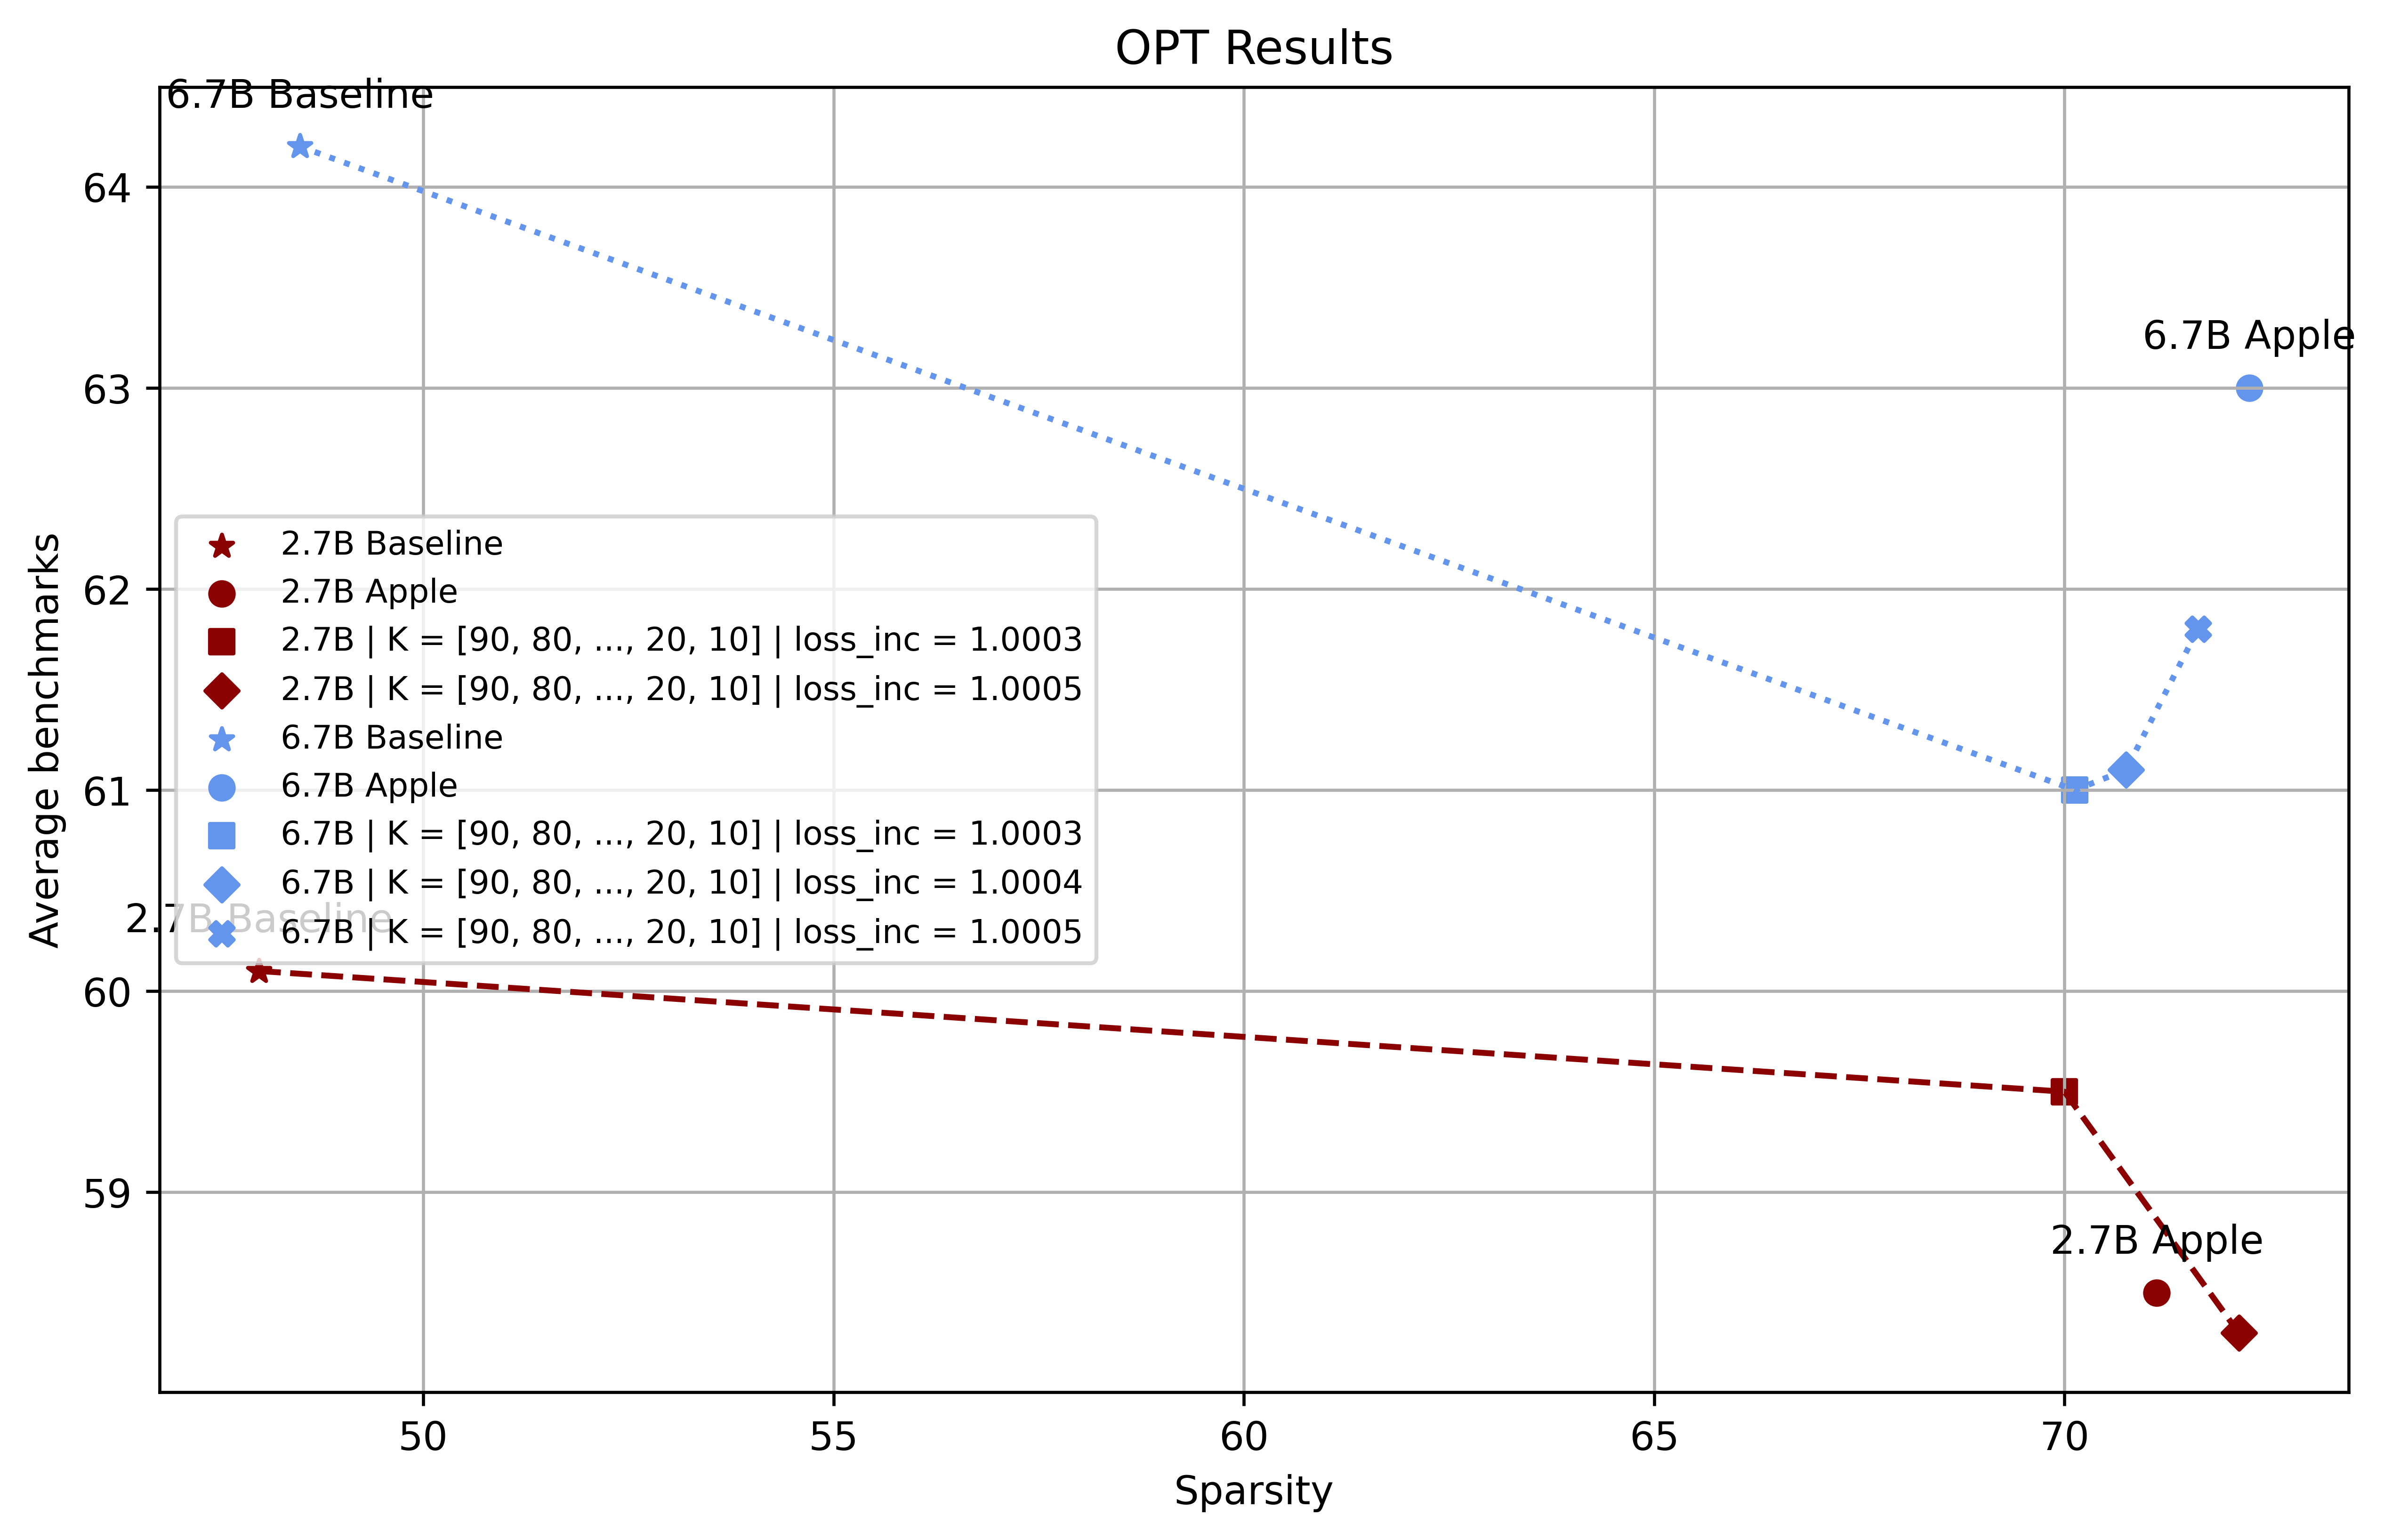

In [2]:
opt_results = {'2.7B': {'Baseline': {'Sparsity': 48, 'Avg benchmarks': 60.1}, 
                         'Apple' : {'Sparsity':71.125 , 'Avg benchmarks': 58.5},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0003' : {'Sparsity': 70, 'Avg benchmarks': 59.5},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0005' : {'Sparsity': 72.125, 'Avg benchmarks': 58.3},
                        },
                '6.7B': {'Baseline': {'Sparsity': 48.5, 'Avg benchmarks': 64.2},
                         'Apple': {'Sparsity': 72.25, 'Avg benchmarks': 63.0},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0003' : {'Sparsity': 70.125, 'Avg benchmarks': 61.0},
                         '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0004' : {'Sparsity': 70.75, 'Avg benchmarks': 61.1},
                       '| K = [90, 80, ..., 20, 10] | loss_inc = 1.0005': {'Sparsity': 71.625, 'Avg benchmarks': 61.8},
                       }
                }

plot_sparse_models(opt_results, model_type='OPT')

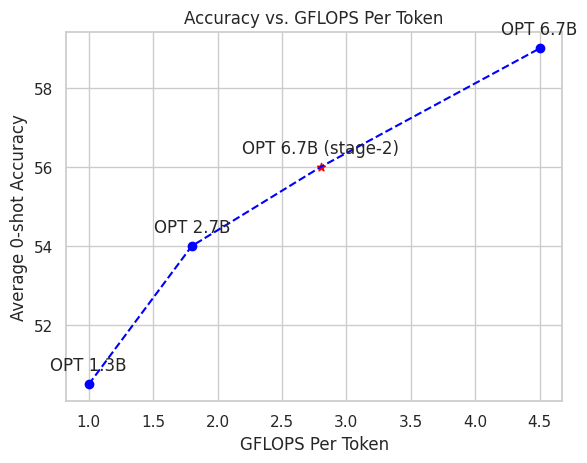

In [21]:
import matplotlib.pyplot as plt

# Data points
x = [1.0, 1.8, 2.8, 4.5]
y = [50.5, 54.0, 56.0, 59.0]
labels = ['OPT 1.3B', 'OPT 2.7B', 'OPT 6.7B (stage-2)', 'OPT 6.7B']
markers = ['o', 'o', '*', 'o']
colors = ['blue', 'blue', 'red', 'blue']

# Plot data points
for i in range(len(x)):
    plt.scatter(x[i], y[i], label=labels[i], marker=markers[i], color=colors[i])

# Connect the dots with a dashed line
plt.plot(x, y, linestyle='dashed', color='blue')

# Add annotations
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('GFLOPS Per Token')
plt.ylabel('Average 0-shot Accuracy')
plt.title('Accuracy vs. GFLOPS Per Token')

# Show plot
plt.show()


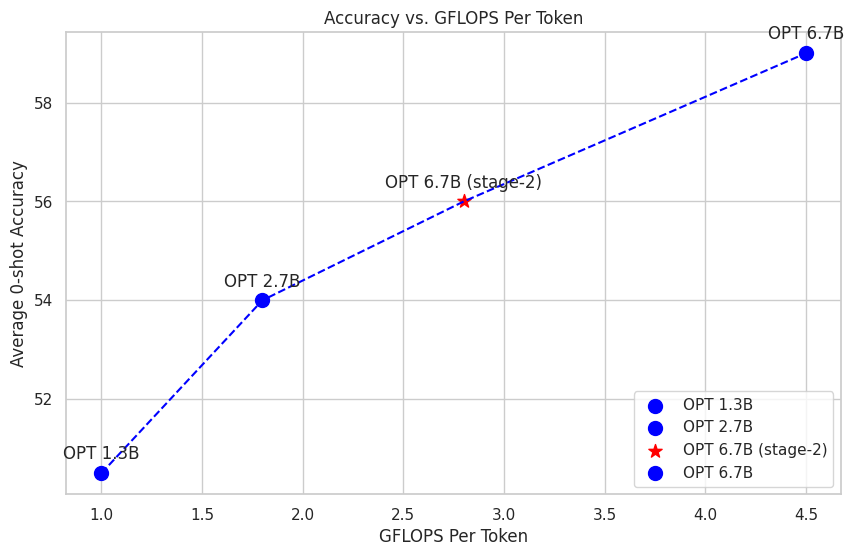

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data points
x = [1.0, 1.8, 2.8, 4.5]
y = [50.5, 54.0, 56.0, 59.0]
labels = ['OPT 1.3B', 'OPT 2.7B', 'OPT 6.7B (stage-2)', 'OPT 6.7B']
markers = ['o', 'o', '*', 'o']
colors = ['blue', 'blue', 'red', 'blue']

# Initialize the plot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plot data points
for i in range(len(x)):
    plt.scatter(x[i], y[i], label=labels[i], marker=markers[i], color=colors[i], s=100)

# Connect the dots with a dashed line
plt.plot(x, y, linestyle='dashed', color='blue')

# Add annotations
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('GFLOPS Per Token')
plt.ylabel('Average 0-shot Accuracy')
plt.title('Accuracy vs. GFLOPS Per Token')

# Enhance the legend
plt.legend(loc='lower right')

# Show plot
plt.show()


In [80]:
res1 = {'Baseline': {'BLEU': 26, 'FLOPs': 1316.14},
        'ReLU from scratch': {'BLEU': 25.3, 'FLOPs': 832.3},
        'ReLU Finetuned': {'BLEU': 26.1, 'FLOPs': 933.7},
}

def plot_stage_1(res):
    import matplotlib.pyplot as plt

    colors = ['darkred', 'cornflowerblue', 'green']
    markers = ['*', 'o', 's', 'D', 'X']
    linestyles = ['dashed', 'dotted', 'dashdot', 'solid']

    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

    for i, (key, value) in enumerate(res.items()):
        x = value['FLOPs']
        y = value['BLEU']
        marker = markers[i % len(markers)]
        color = colors[i % len(colors)]
        label = key
        
        ax.scatter(x, y, marker=marker, color=color, label=f'{key}')


    plt.xticks([val['FLOPs'] for val in res.values()][:3])

    ax.set_ylabel('BLEU')
    ax.set_xlabel('FLOPs')
    ax.set_title(f'Sparsification results')
    ax.legend()
    # ax.legend(fontsize='small')
    plt.show()

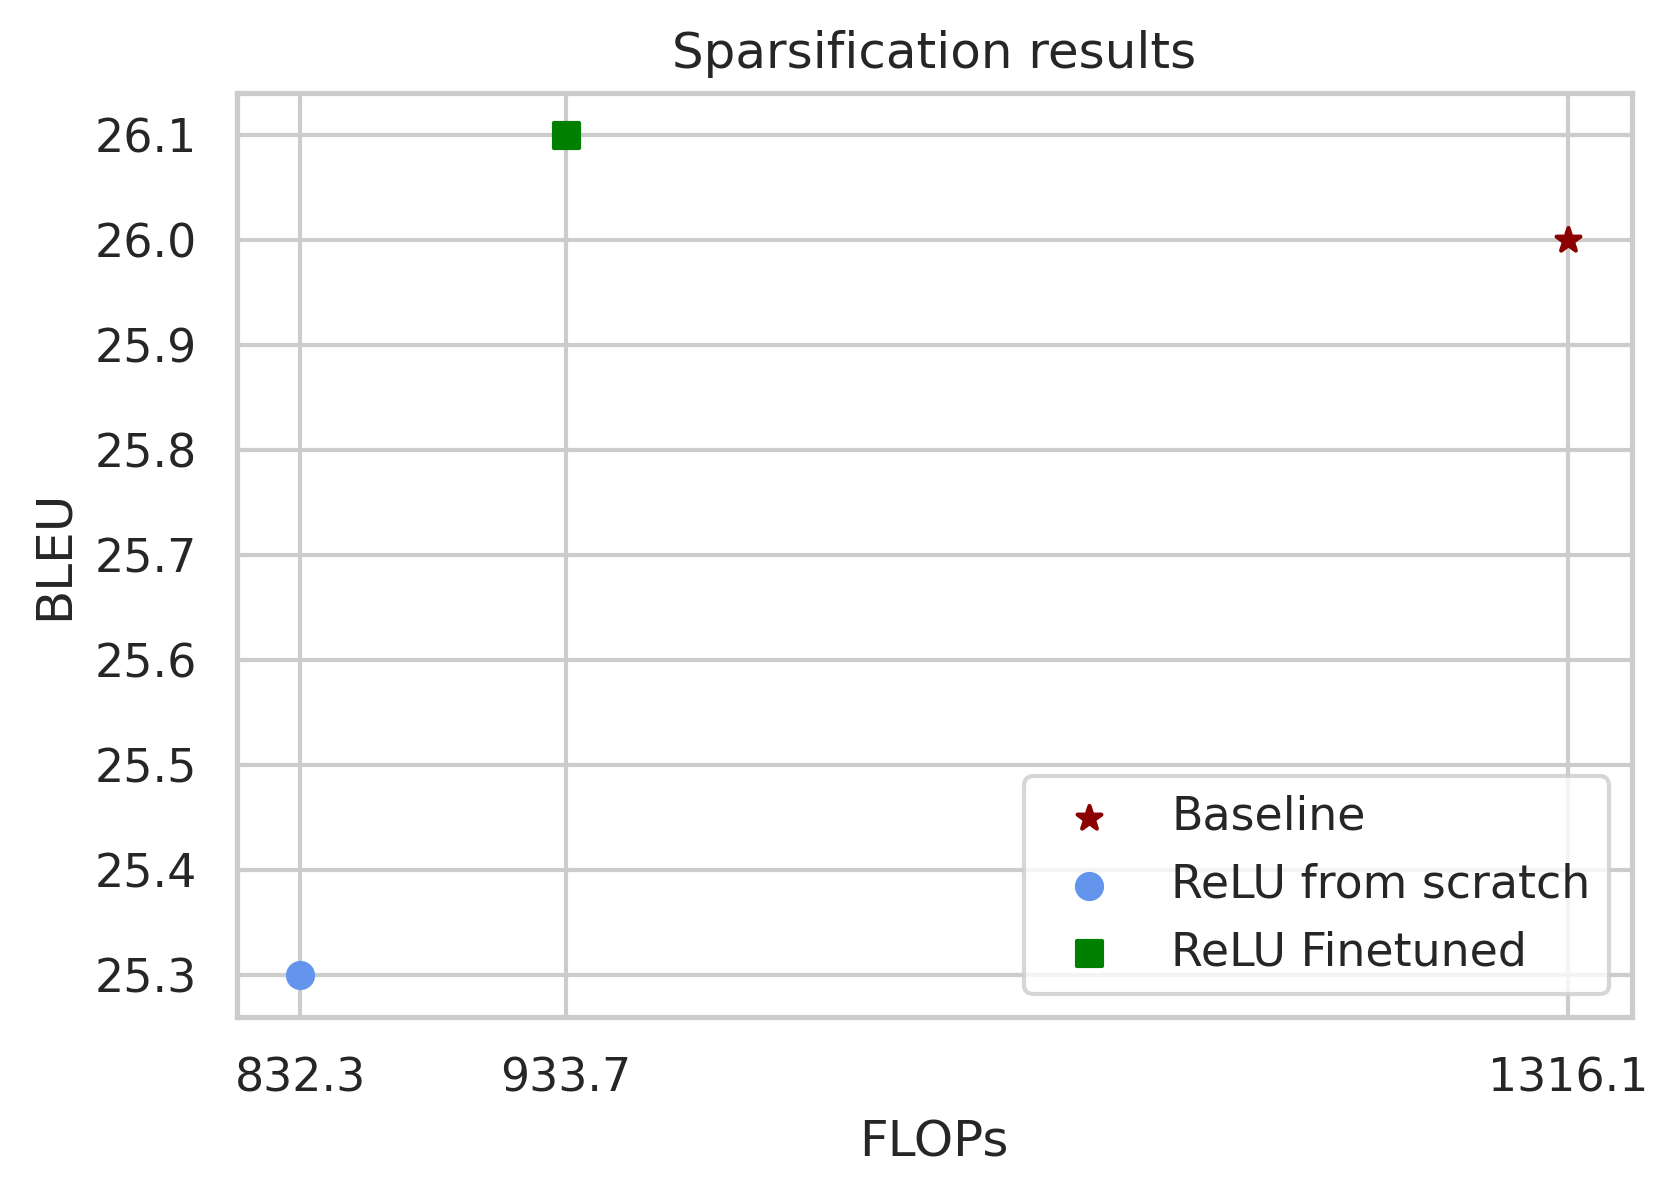

In [81]:
res1 = {'Baseline': {'BLEU': 26, 'FLOPs': 1316.14},
        'ReLU from scratch': {'BLEU': 25.3, 'FLOPs': 832.3},
        'ReLU Finetuned': {'BLEU': 26.1, 'FLOPs': 933.7},
}
plot_stage_1(res1)

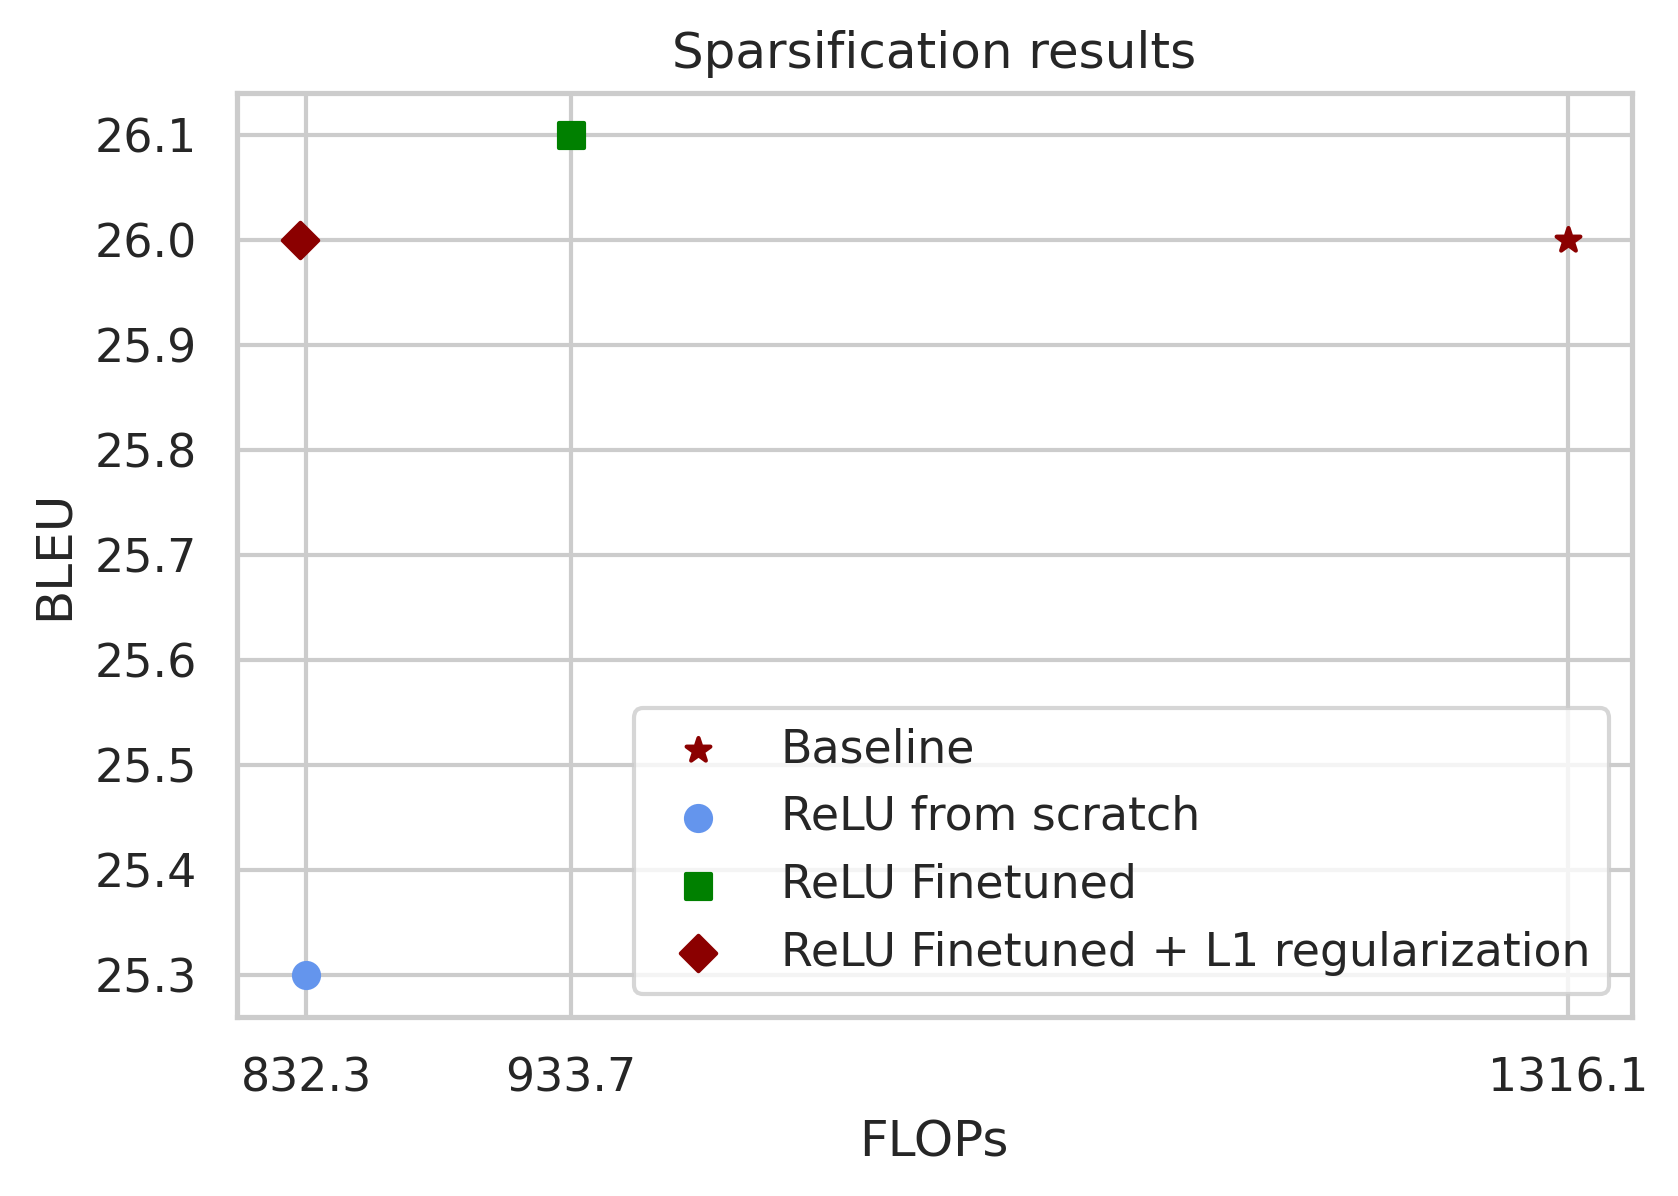

In [82]:
res2 = {'Baseline': {'BLEU': 26, 'FLOPs': 1316.14},
        'ReLU from scratch': {'BLEU': 25.3, 'FLOPs': 832.3},
        'ReLU Finetuned': {'BLEU': 26.1, 'FLOPs': 933.7},
        'ReLU Finetuned + L1 regularization': {'BLEU': 26, 'FLOPs': 830},
}

plot_stage_1(res2)

In [1]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(5, -1, -1):
    print(i)

5
4
3
2
1
0


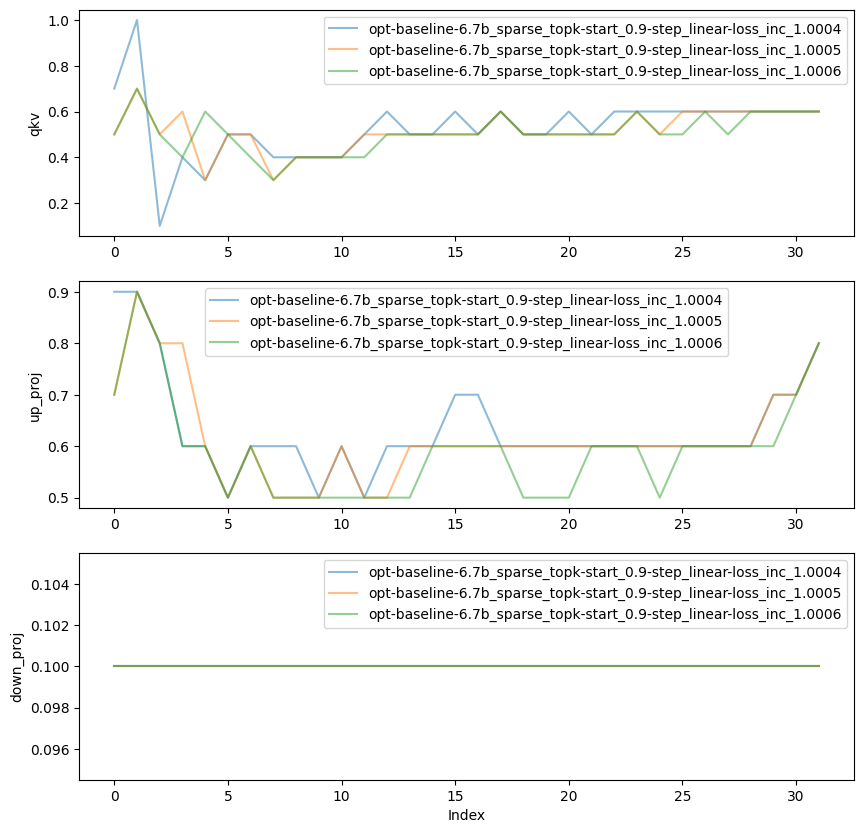

In [6]:
values = {
    'opt-baseline-6.7b_sparse_topk-start_0.9-step_linear-loss_inc_1.0004': 
        {'qkv': [0.7, 1.0, 0.1, 0.4, 0.3, 0.5, 0.5, 0.4, 0.4, 0.4, 0.4, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], 
         'up_proj': [0.9, 0.9, 0.8, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.7, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.8], 
         'down_proj': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},
    'opt-baseline-6.7b_sparse_topk-start_0.9-step_linear-loss_inc_1.0005':
    {'qkv': [0.5, 0.7, 0.5, 0.6, 0.3, 0.5, 0.5, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6], 
    'up_proj': [0.7, 0.9, 0.8, 0.8, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.8], 
    'down_proj': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]},

    'opt-baseline-6.7b_sparse_topk-start_0.9-step_linear-loss_inc_1.0006': 
        {'qkv': [0.5, 0.7, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.5, 0.5, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6], 
         'up_proj': [0.7, 0.9, 0.8, 0.6, 0.6, 0.5, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.8], 
         'down_proj': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}
    , 
}
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for model, values in values.items():
    axs[0].plot(values['qkv'], label=model, alpha=0.5)
    axs[1].plot(values['up_proj'], label=model, alpha=0.5)
    axs[2].plot(values['down_proj'], label=model, alpha=0.5)

axs[0].set_ylabel('qkv')
axs[1].set_ylabel('up_proj')
axs[2].set_ylabel('down_proj')

axs[2].set_xlabel('Index')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()


